# Intermediate Data Visualiation with Seaborn

Visualising distributions is a fundamental component of exploratory data analysis (EDA). Python offers several robust, flexible libraries for this purpose - **matplotlib**, **pandas**, and **seaborn** - each with its strengths, API styles, and advanced features. Understanding how to harness each, especially using the object-oriented (OOP) interface, is vital for producing publication-quality, insightful visualisations.

### 1. Matplotlib: The Foundation

**Matplotlib** is the core plotting library in Python. Most other libraries, including seaborn, are built on top of it. Mastering matplotlib (especially its object-oriented interface) is crucial for creating highly customised, reproducible graphics.

#### Basic Histogram (OOP Interface)

```python
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wines.csv")

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df['alcohol'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title("Alcohol Content Distribution")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()
```

**Key Notes:**
- Use `fig, ax = plt.subplots()` for the OOP interface, enabling more advanced layouts and customisation.
- Adjust `bins`, `color`, `alpha`, and `edgecolor` for visual clarity.
- Always label axes and titles for interpretability.

### 2. Pandas: Quick and Convenient Plotting

**Pandas** builds on matplotlib, exposing direct plotting methods from DataFrame and Series objects. This is ideal for quick, simple EDA, though less flexible than raw matplotlib.

#### Histogram with Pandas

```python
import pandas as pd

df = pd.read_csv("wines.csv")

ax = df['alcohol'].plot.hist(
    bins=30, color='orchid', edgecolor='black', alpha=0.8, figsize=(8, 5)
)
ax.set_title("Alcohol Content Distribution (Pandas)")
ax.set_xlabel("Alcohol (%)")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()
```

**Notes:**
- Pandas uses the matplotlib backend, so you can still use the OOP interface to further tweak the resulting `ax`.
- For complex visualisations, migrate to matplotlib or seaborn.

### 3. Seaborn: Statistical Visualisation with Ease

**Seaborn** is a statistical plotting library built atop matplotlib, designed for quick, high-level, and visually appealing plots. It is tightly integrated with pandas DataFrames.

#### Histogram with Seaborn's `histplot`

##### API (Functional) Interface

```python
import seaborn as sns
import pandas as pd

df = pd.read_csv("wines.csv")

sns.histplot(df['alcohol'], bins=30, color='mediumseagreen', kde=False)
plt.title("Alcohol Content Histogram (Seaborn histplot)")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
```

##### OOP (FacetGrid) Interface

```python
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("wines.csv")

g = sns.displot(df['alcohol'], bins=30, color='deepskyblue', height=5, aspect=1.6)
g.set_axis_labels("Alcohol (%)", "Frequency")
g.fig.suptitle("Alcohol Content Histogram (Seaborn displot)", y=1.03)
plt.tight_layout()
plt.show()
```

#### Kernel Density Estimate (KDE) with Seaborn

Seaborn's `displot` supports multiple kinds of distribution plots, including KDE.

```python
g = sns.displot(df['alcohol'], kind='kde', fill=True, height=5, aspect=1.6)
g.set_axis_labels("Alcohol (%)", "Density")
g.fig.suptitle("Alcohol Content Density (KDE, Seaborn displot)", y=1.03)
plt.tight_layout()
plt.show()
```

### 4. Comparing Histogram APIs: Pandas vs. Seaborn

#### Pandas `.plot.hist()`:

- Plots actual frequency.
- No bar outlines or advanced styling by default.
- Wide bins unless specified.
- Fast, but limited customisation.

#### Seaborn `histplot` / `displot`:

- Automatic axis labelling and attractive styling.
- Muted, modern color palettes by default.
- More precise control over plot appearance, supports multiple plot types.
- OOP `FacetGrid` interface enables easy faceting, labelling, and layout control.

### Best Practices 

- Prefer the OOP interface (`fig, ax = plt.subplots()`, or `FacetGrid` in seaborn) for maximum control and composability.
- Always set axis labels and titles.
- Use `plt.tight_layout()` to avoid overlapping elements.
- Explore additional parameters: `bins`, `hue`, `palette`, `alpha`, `edgecolor`, `height`, `aspect` for tailored, professional plots.
- For exploratory work, pandas is quick; for publication-quality or advanced analysis, migrate to seaborn or raw matplotlib.


Python's data visualisation ecosystem offers layered options—**matplotlib** for full control, **pandas** for speed and simplicity, and **seaborn** for statistical sophistication and aesthetics. Master all three, especially the OOP approach, to produce visually compelling and highly informative distribution plots for your data science projects.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import requests
import os

In [3]:
wine = pd.read_csv("https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Reading a csv file
This is data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

In [4]:
school = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/205443d734f177d36dad2f0bdf821a57b2c4cc13/schoolimprovement2010grants.csv")
school.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


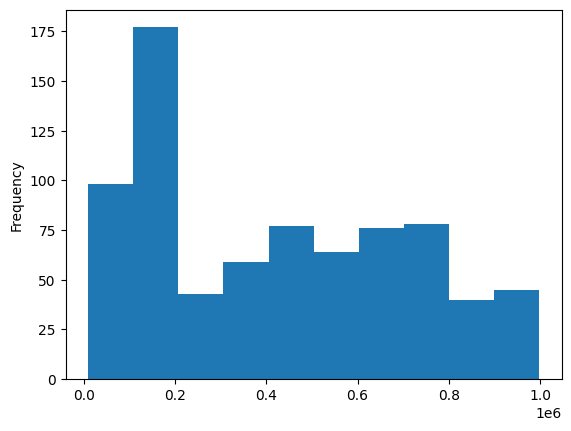

In [5]:
# Use the pandas' plot.hist() function to plot a histogram of the Award_Amount column.
school["Award_Amount"].plot.hist()
plt.show()

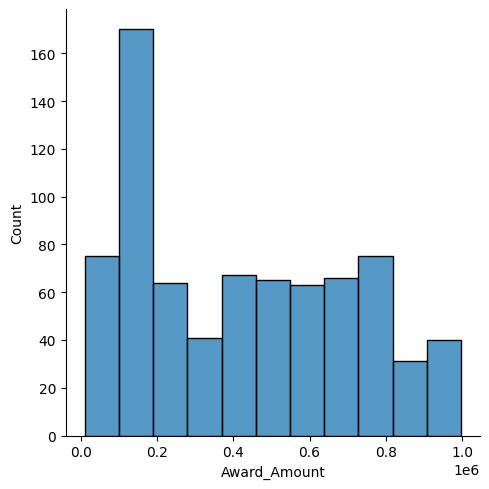

In [6]:
# Use Seaborn's displot() function to plot a distribution plot of the same column.
sns.displot(school["Award_Amount"])
plt.show()

## Using the Distribution Plot: `displot` in Seaborn


Understanding the shape and characteristics of your data’s distribution is foundational in exploratory data analysis (EDA). **Seaborn’s `displot` function** provides a high-level, flexible, and Pythonic interface for visualising distributions in multiple ways—histograms, KDEs, rug plots, and ECDFs—enabling comprehensive, publication-quality insights with minimal code.


### The Power of `displot`

#### What is `displot`?

- `displot` is a figure-level function in Seaborn for visualising univariate and bivariate distributions.
- It leverages several underlying Seaborn functions (`histplot`, `kdeplot`, `rugplot`, `ecdfplot`) and returns a `FacetGrid` object for advanced customisation.
- Supports both the API (functional) interface and an OOP-like approach via FacetGrid methods.

### Creating Histograms

Histograms are the most common way to visualise the frequency distribution of a continuous variable.

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wines.csv")

# Histogram with KDE overlay, custom number of bins
g = sns.displot(
    df['alcohol'], 
    bins=10, 
    kde=True, 
    color='royalblue', 
    height=5, 
    aspect=1.4,
    edgecolor='black', 
    alpha=0.7
)
g.set_axis_labels("Alcohol (%)", "Frequency")
g.fig.suptitle("Distribution of Alcohol Content (Histogram + KDE)", y=1.02)
plt.tight_layout()
plt.show()
```

**Tips for Beautiful Histograms:**
- Adjust `bins` for granularity.
- Use `edgecolor` for visual clarity.
- `kde=True` overlays a kernel density estimate for smoothness.



### Alternative Data Distributions

#### Rug Plot: Fine-Grained Data Representation

A **rug plot** places a small tick for each data point along the x-axis, providing a direct sense of data density.

- **Combine rug and KDE for nuanced visualisation:**

```python
g = sns.displot(
    df['alcohol'],
    kind='kde',
    rug=True,
    fill=True,
    bw_adjust=1.2,          # Adjust bandwidth for smoother or rougher KDE
    color='darkorange',
    height=5,
    aspect=1.4
)
g.set_axis_labels("Alcohol (%)", "Density")
g.fig.suptitle("Alcohol Content: KDE with Rug Plot", y=1.02)
plt.tight_layout()
plt.show()
```


### Cumulative Distribution: ECDF Plot

An **Empirical Cumulative Distribution Function (ECDF)** plot shows the proportion of values less than or equal to each value in the data—useful for understanding percentiles and quantiles.

```python
g = sns.displot(
    df['alcohol'],
    kind='ecdf',
    color='teal',
    height=5,
    aspect=1.4
)
g.set_axis_labels("Alcohol (%)", "ECDF")
g.fig.suptitle("Cumulative Distribution of Alcohol Content (ECDF)", y=1.02)
plt.tight_layout()
plt.show()
```

### Advanced Options and Best Practices

- **Customise plot size** with `height` and `aspect` for publication-quality figures.
- **Leverage the returned `FacetGrid`**: Add further customisation (titles, labels, annotation) via OOP methods.
- **Overlay multiple distributions**: Pass `hue` for group-wise comparisons.
- **Fine-tune KDE**: Use `bw_adjust` to smooth or sharpen the density curve.
- **Automatic and beautiful**: Seaborn handles axis labels, palettes, and plot arrangement, but always check for interpretability.

### Rationale

- **Histogram**: Visualises discrete bins of data frequencies—ideal for overall shape and outlier detection.
- **KDE**: Smooths the distribution, giving a probabilistic sense of density.
- **Rug Plot**: Visualises every data point, highlighting clusters and sparsity.
- **ECDF**: Directly interpretable as percentiles and quantiles; robust to outliers and ideal for comparing distributions.




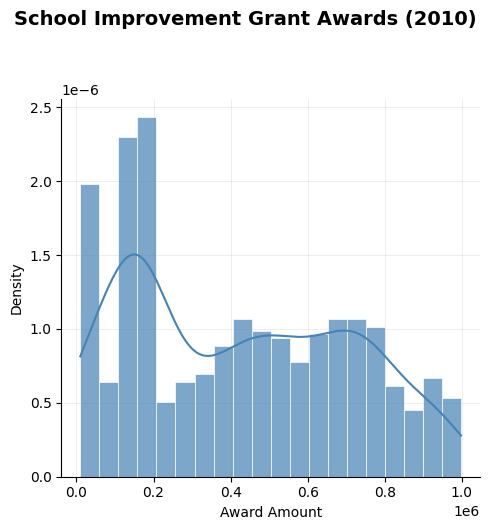

In [7]:
# Create a displot for the data.
g = sns.displot(
    school["Award_Amount"],
    bins=20,  # Explicitly pass in the number 20 for the number of bins in the histogram.
    color="steelblue",
    kde=True,  # Add KDE overlay for smooth distribution
    stat="density",  # Show density instead of count for better interpretation
    alpha=0.7,
    edgecolor="white",
    linewidth=0.5,
)

# Add vertical lines for key statistics
for ax in g.axes.flat:    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
g.figure.suptitle("School Improvement Grant Awards (2010)", 
                  y=1.05, fontsize=14, fontweight='bold')
g.set_axis_labels("Award Amount", "Density")

plt.tight_layout()
plt.show()

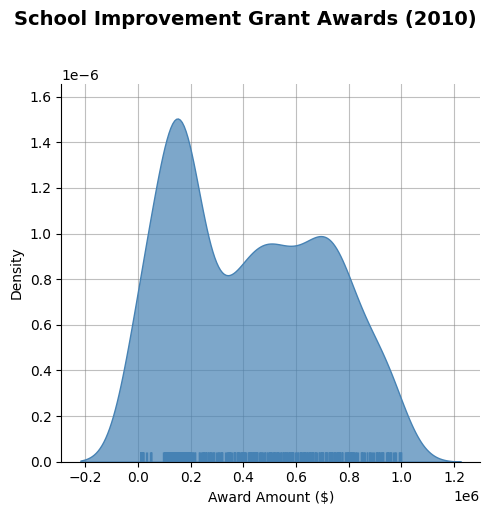

In [8]:
# Configure it to show a shaded kde plot (using the kind and fill parameters).
# Add a rug plot above the x axis (using the rug parameter).

g = sns.displot(data=school["Award_Amount"], 
                kind="kde", 
                rug=True, 
                fill=True,
                color="steelblue",
                alpha=0.7)
g.figure.suptitle("School Improvement Grant Awards (2010)", 
                  fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Award Amount ($)", "Density")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.5, color="grey", zorder=True)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

## Regression Plots in Seaborn

**Regression plots** are essential in data analysis for visualising relationships and trends between two quantitative variables. Seaborn, built on matplotlib, offers powerful, Pythonic tools for regression visualisation: `regplot` (low-level) and `lmplot` (high-level). These functions enable quick, rigorous exploration of linear relationships, complete with confidence intervals, faceting, and advanced aesthetics.

### 1. `regplot`: The Foundation for Regression Visualization

#### What is `regplot`?

- A low-level Seaborn function for generating scatter plots with an optional linear regression fit.
- Accepts both arrays/Series and DataFrame columns.
- Provides fine-grained control over plot appearance.

#### Example: Simple Regression Plot

```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("wines.csv")

fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df,
    x="alcohol",
    y="pH",
    ax=ax,
    color="mediumblue",
    scatter_kws={"alpha": 0.7, "s": 45, "edgecolor": "k"},
    line_kws={"linewidth": 2, "color": "orangered"},
    ci=95,                  # Confidence interval (default is 95%)
    marker="o",
)
ax.set_title("Regression of pH on Alcohol Content")
plt.tight_layout()
plt.show()
```

**Key parameters:**
- `scatter_kws`: dictionary of matplotlib kwargs for scatter points.
- `line_kws`: dictionary for regression line styling.
- `ci`: width of the confidence interval around the regression line.
- Always use the OOP (`ax=`) interface for more control and composability.


### 2. `lmplot`: High-Level, Faceted Regression Analysis

#### What is `lmplot`?

- A figure-level, high-level interface to regression plotting.
- Built on top of `regplot`.
- Enables faceting (splitting plots by categories), hue, and more.
- Returns a `FacetGrid` object, facilitating multi-panel (faceted) visualisation.

#### Example: Simple Regression with `lmplot`

```python
import seaborn as sns
import pandas as pd

df = pd.read_csv("wines.csv")

g = sns.lmplot(
    data=df,
    x="alcohol",
    y="quality",
    height=5,
    aspect=1.4,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "crimson"},
    ci=95
)
g.set_axis_labels("Alcohol (%)", "Quality")
g.fig.suptitle("Regression of Quality on Alcohol Content", y=1.02)
plt.tight_layout()
plt.show()
```
### 3. Faceting: Grouped Regression Analysis

#### Faceting by Color (hue)

Plot regression lines for subgroups, distinguished by color.

```python
g = sns.lmplot(
    data=df,
    x="quality",
    y="alcohol",
    hue="category_variable",  # Replace with your categorical column
    height=5,
    aspect=1.3,
    scatter_kws={"alpha": 0.6}
)
g.set_axis_labels("Quality", "Alcohol (%)")
g.fig.suptitle("Grouped Regression by Category (hue)", y=1.02)
plt.tight_layout()
plt.show()
```

#### Faceting by Columns (col)

Produce side-by-side panels for each group:

```python
g = sns.lmplot(
    data=df,
    x="quality",
    y="alcohol",
    col="category_variable",  # Replace with your categorical column
    col_wrap=3,               # Controls layout if many panels
    height=4,
    aspect=1,
    scatter_kws={"alpha": 0.7}
)
g.set_axis_labels("Quality", "Alcohol (%)")
g.fig.suptitle("Regression Faceted by Category (col)", y=1.05)
plt.tight_layout()
plt.show()
```
### When to Use `regplot` vs. `lmplot`

- **`regplot`**: Use for single, in-depth regression visualisations with fine control over every element (OOP-style).
- **`lmplot`**: Use for multi-panel, faceted regression analysis, rapid group-wise exploration, or publication-ready graphics with minimal code.


### Statistical and Practical Considerations

- Both `regplot` and `lmplot` default to **ordinary least squares (OLS)** linear regression; nonparametric options are available (e.g., lowess).
- Always inspect scatter, fit, and confidence interval. Consider outliers, nonlinearity, and heteroscedasticity.
- Faceting is invaluable for comparing relationships across categories.

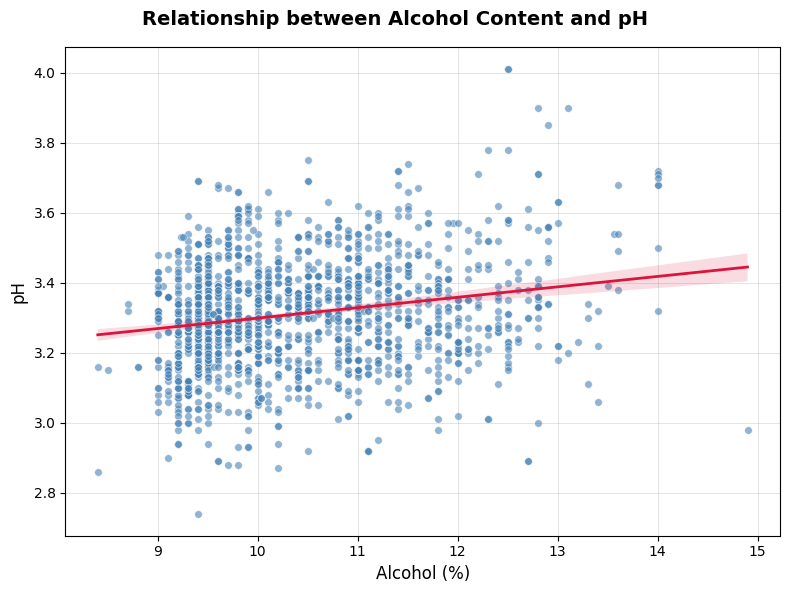

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    data=wine, 
    x="alcohol", 
    y="pH", 
    ax=ax,
    scatter_kws={"alpha": 0.6, "s": 30, "color": "steelblue", "edgecolor": "white", "linewidths": 0.5},
    line_kws={"color": "crimson", "linewidth": 2},
    ci=95
)

fig.suptitle("Relationship between Alcohol Content and pH", fontsize=14, fontweight='bold')
ax.set_xlabel("Alcohol (%)", fontsize=12)
ax.set_ylabel("pH", fontsize=12)
ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

ax.tick_params(labelsize=10)
    
plt.tight_layout()
plt.show()

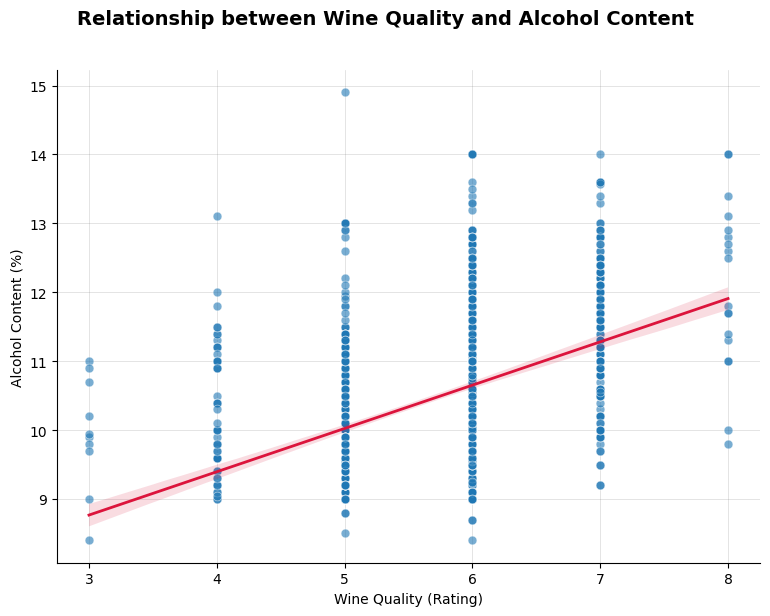

In [10]:
g = sns.lmplot(
    data=wine, 
    x="quality", 
    y="alcohol", 
    height=6, 
    aspect=1.3,
    scatter_kws={"alpha": 0.6, "s": 40, "edgecolor": "white", "linewidths": 0.5},
    line_kws={"color": "crimson", "linewidth": 2},
    ci=95
)

g.figure.suptitle("Relationship between Wine Quality and Alcohol Content", 
                  fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Wine Quality (Rating)", "Alcohol Content (%)")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="grey", linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)
    
plt.tight_layout()
plt.show()

FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.

In [11]:
insurance = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/1a8176dc594fc0a13a9f1a7b207d30ed312f2e4a/insurance_premiums.csv")
insurance.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


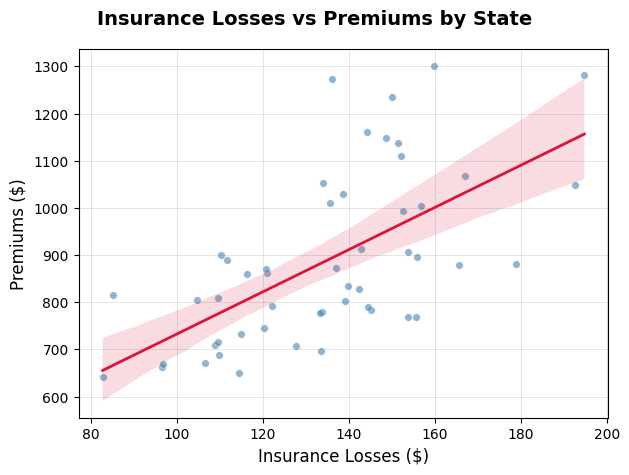

In [12]:
# Create a regression plot using regplot() with "insurance_losses" on the x axis and "premiums" on the y axis.
fig, ax = plt.subplots()

sns.regplot(
    data=insurance,
    x="insurance_losses",
    y="premiums",
    ax=ax,
    scatter_kws={
        "alpha": 0.6,
        "s": 30,
        "color": "steelblue",
        "edgecolor": "white",
        "linewidths": 0.5,
    },
    line_kws={"color": "crimson", "linewidth": 2},
    ci=95,
)

fig.suptitle("Insurance Losses vs Premiums by State", fontsize=14, fontweight='bold')
ax.set_xlabel("Insurance Losses ($)", fontsize=12)
ax.set_ylabel("Premiums ($)", fontsize=12)

ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

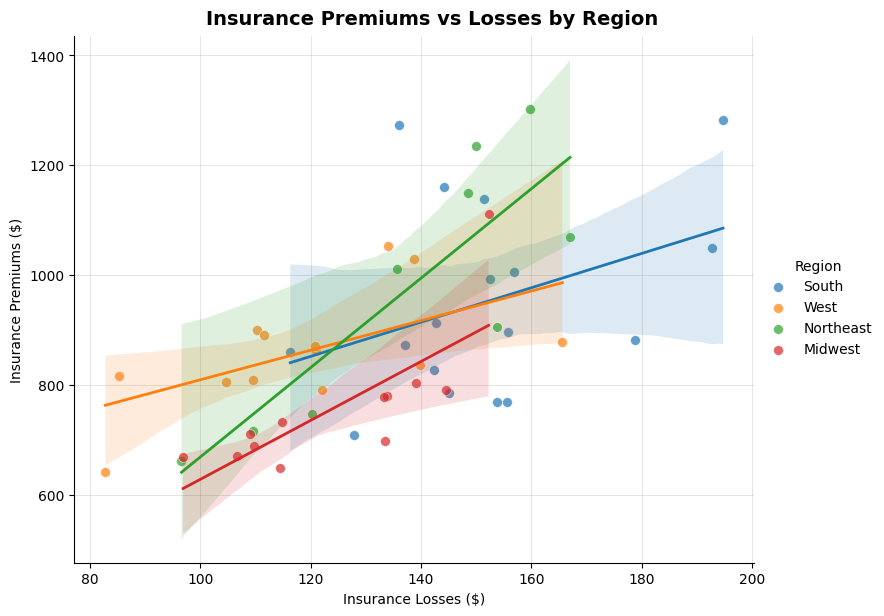

In [13]:
# Create a regression plot of "premiums" versus "insurance_losses" using lmplot().
g = sns.lmplot(
    data=insurance,
    x="insurance_losses",
    y="premiums",
    hue="Region",
    height=6,
    aspect=1.3,
    scatter_kws={"alpha": 0.7, "s": 50, "edgecolor": "white", "linewidths": 0.5},
    line_kws={"linewidth": 2},
    ci=95
)

g.figure.suptitle("Insurance Premiums vs Losses by Region", fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Insurance Losses ($)", "Insurance Premiums ($)")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)

plt.show()

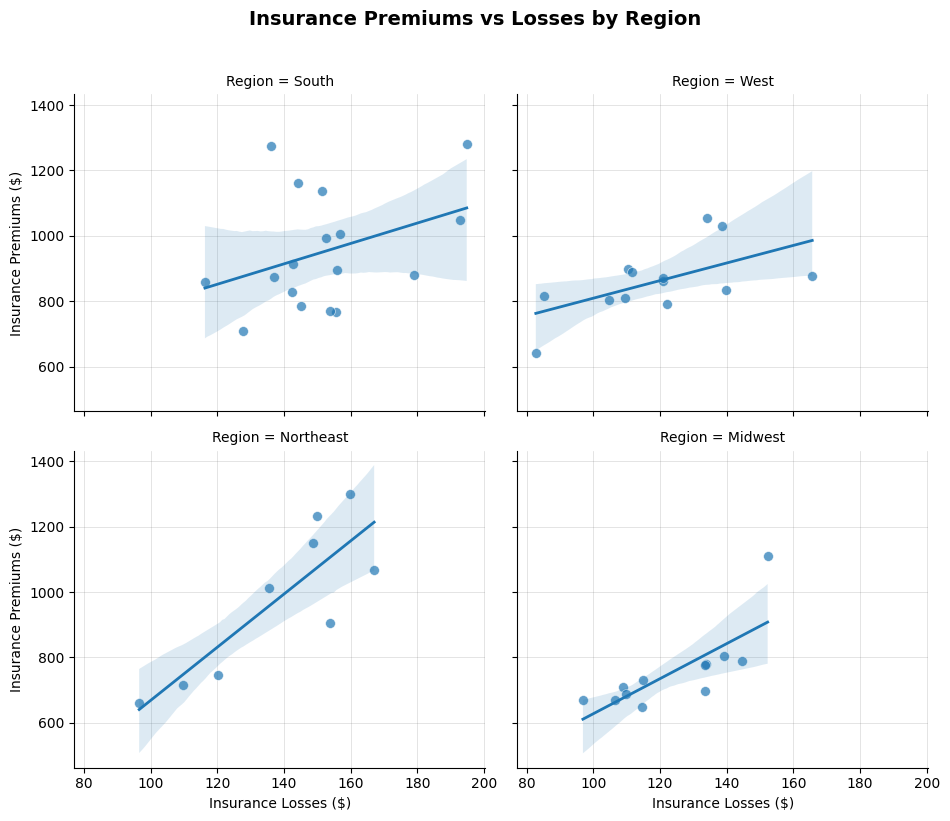

In [14]:
# Create a regression plot with multiple rows
g = sns.lmplot(
    data=insurance,
    x="insurance_losses",
    y="premiums",
    col="Region",
    col_wrap=2,  # This creates 2 columns
    height=4,  # Reduced height since we'll have multiple rows
    aspect=1.2,  # Adjust aspect ratio for better fit
    scatter_kws={"alpha": 0.7, "s": 50, "edgecolor": "white", "linewidths": 0.5},
    line_kws={"linewidth": 2},
    ci=95,
)

g.figure.suptitle("Insurance Premiums vs Losses by Region", fontsize=14, fontweight="bold", y=1.02)
g.set_axis_labels("Insurance Losses ($)", "Insurance Premiums ($)")

for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="gray", linestyle="-", linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

## Using Seaborn Styles for Publication-Quality Plots

The **visual style** of your plots is not just about aesthetics; it enhances interpretability and communicates insights with impact. **Seaborn** is designed with beautiful defaults but also provides powerful ways to fine-tune your visualisations’ style. Mastery of styling is essential for producing publication-quality, Pythonic graphics in exploratory data analysis, reporting, and scientific communication.


### Setting Global Seaborn Styles

Seaborn provides several themes to control the overall appearance of all subsequent plots. These themes apply not just to Seaborn plots but also to matplotlib and pandas figures (when used after setting the style).

#### Setting the Default Style

```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data.csv")

# Set Seaborn's default visual settings
sns.set()
df['variable'].plot.hist(bins=20, alpha=0.7)
plt.title("Histogram with Seaborn Default Style")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
```

- `sns.set()` configures a modern, aesthetically pleasing style for all subsequent plots.

### Theme Examples with `sns.set_style()`

Seaborn includes several preset themes:

- `"white"`: Minimalist, removes gridlines.
- `"dark"`: High-contrast, background darkens, gridlines off.
- `"whitegrid"`: Clean, gridlines on (good for statistical plots).
- `"darkgrid"`: Dark background with gridlines.
- `"ticks"`: Adds ticks to axes for precision, similar to academic publications.

**Looping through styles:**

```python
styles = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']

for style in styles:
    sns.set_style(style)
    # Use displot for a flexible, modern histogram
    g = sns.displot(df['variable'], bins=20, color='dodgerblue', height=4, aspect=1.4)
    g.fig.suptitle(f"Seaborn Style: {style}", y=1.03)
    plt.tight_layout()
    plt.show()
```

**Tips:**
- Try each style with your data—some highlight distributions, others are best for presentations or publications.
- Use `height` and `aspect` for plot sizing.

### Removing Axes with `sns.despine()`

For clarity, especially in minimalist graphics or publications, you may wish to remove the top and right “spines” (axes lines).

```python
sns.set_style('white')
g = sns.displot(df['variable'], bins=20, color='orchid', height=4, aspect=1.4)
sns.despine(left=True, bottom=True)
g.fig.suptitle("Histogram with Minimalist Style and Despined Axes", y=1.03)
plt.tight_layout()
plt.show()
```

- `sns.despine()` is typically called **after** the plot is created.
- `left=True`, `bottom=True` remove the left and bottom spines, respectively.
- You can also pass an `ax` argument to target a specific axes object in the OOP interface.

### Best Practices and Advanced Styling Tips

- Always **set styles at the beginning** of your analysis or script to ensure consistency.
- Combine Seaborn’s themes with custom `matplotlib` tweaks for advanced requirements.
- For academic, print, or black-and-white publication, `"whitegrid"` or `"ticks"` are often preferred.
- Use `palette` options for colour control and accessibility.
- Remember: Seaborn styling will also affect matplotlib and pandas plots if set globally.

In [15]:
rent = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/a1fb97d60bfbcf0661e320a35a4615f4e8661a68/FY18_4050_FMRs.csv")
rent.head()

,fips2010,fmr_0,fmr_1,fmr_2,fmr_3,fmr_4,state,metro_code,areaname,county,cousub,countyname,county_town_name,pop2010,acs_2017_2,state_alpha,fmr_type,metro,fmr_pct_chg,fmr_dollar_chg
0,100199999,588,691,829,1055,1451,1,METRO33860M33860,"Montgomery, AL MSA",1,99999,Autauga County,Autauga County,54571.0,822,AL,40,1,0.008516,7
1,100399999,729,762,879,1280,1471,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,99999,Baldwin County,Baldwin County,182265.0,977,AL,40,1,-0.100307,-98
2,100599999,491,494,657,824,929,1,NCNTY01005N01005,"Barbour County, AL",5,99999,Barbour County,Barbour County,27457.0,671,AL,40,0,-0.020864,-14
3,100799999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,99999,Bibb County,Bibb County,22915.0,866,AL,40,1,0.018476,16
4,100999999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,99999,Blount County,Blount County,57322.0,866,AL,40,1,0.018476,16


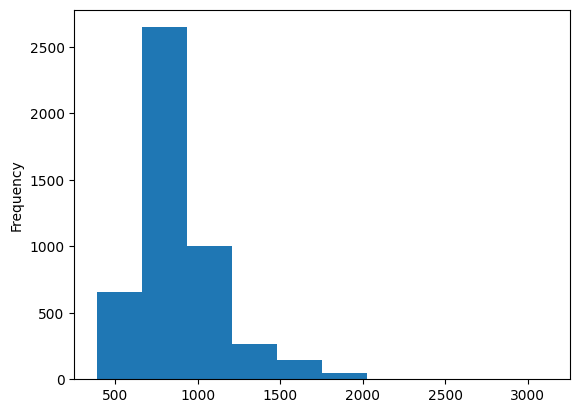

In [16]:
# Plot a pandas histogram without adjusting the style.
rent["fmr_2"].plot.hist()
plt.show()

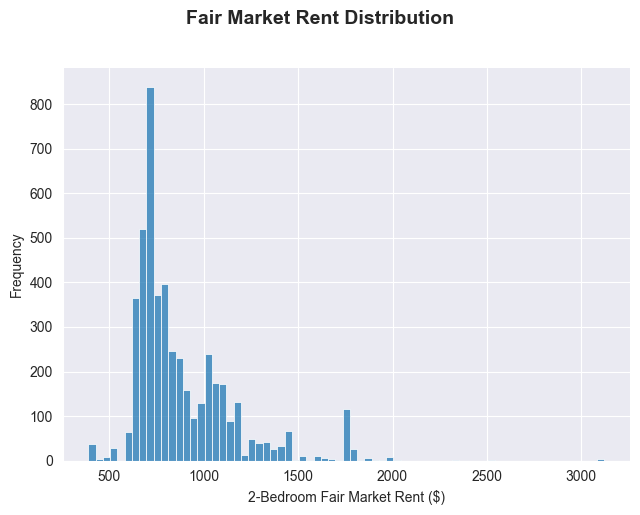

In [17]:
with sns.axes_style("darkgrid"):
    g = sns.displot(data=rent, 
                    x="fmr_2", 
                    height=5, 
                    aspect=1.3)
    
    g.figure.suptitle("Fair Market Rent Distribution", fontsize=14, fontweight='bold', y=1.02)
    g.set_axis_labels("2-Bedroom Fair Market Rent ($)", "Frequency")
    sns.despine()
    
    plt.tight_layout()
    plt.show()

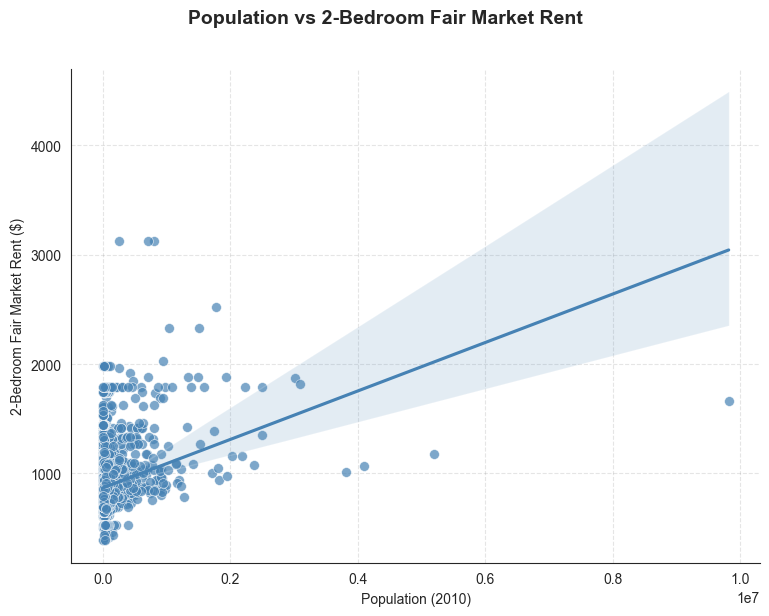

In [18]:
# Set the style to white
with sns.axes_style("white"):
    # Create a regression plot
    g = sns.lmplot(
        data=rent,
        x="pop2010",
        y="fmr_2",
        scatter_kws={"alpha": 0.7, "s": 50, "edgecolor": "white", "linewidths": 0.5, "color": "steelblue"},
        line_kws={"color": "steelblue"},
        height=6,
        aspect=1.3,
    )
    g.figure.suptitle("Population vs 2-Bedroom Fair Market Rent", fontsize=14, fontweight="bold", y=1.02)
    g.set_axis_labels("Population (2010)", "2-Bedroom Fair Market Rent ($)")
    
    for ax in g.axes.flat:
        ax.grid(True, alpha=0.2, color="grey", linestyle='--')
        ax.set_axisbelow(True)
    
    sns.despine()

    plt.tight_layout()
    plt.show()

## Colors in Seaborn


Effective use of color in data visualisation communicates patterns, highlights relationships, and greatly enhances clarity and aesthetic appeal. **Seaborn** offers intuitive and flexible control over colors, ranging from simple single-color plots to sophisticated multi-color palettes. Mastering color palettes—built-in and custom—is essential for delivering professional-quality visualisations.


### Defining Colors in Seaborn Plots

#### Simple Color Assignment

Seaborn supports **matplotlib color codes** (single-letter strings):

- `"b"` (blue), `"g"` (green), `"r"` (red), `"c"` (cyan), `"m"` (magenta), `"y"` (yellow), `"k"` (black), `"w"` (white).

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

# Enable matplotlib color codes
sns.set(color_codes=True)

# Simple histogram with a defined color
sns.displot(df['variable'], color='g', height=4, aspect=1.4)
plt.title("Histogram with Single Color")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
```

### Using Seaborn Color Palettes

Palettes define cohesive, aesthetic color schemes for plots. Seaborn offers built-in palettes that are scientifically designed for data visualisation clarity.

#### Setting a Palette

The `sns.set_palette()` function globally sets the palette for subsequent plots.

```python
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for p in palettes:
    sns.set_palette(p)
    sns.displot(df['variable'], bins=20, height=4, aspect=1.4)
    plt.title(f"Histogram with '{p}' palette")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
```

### Displaying Palettes

#### Visualising Palette Choices

The `sns.palplot()` function visually displays any palette, assisting in selecting colors for your data's context:

```python
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for p in palettes:
    sns.set_palette(p)
    palette = sns.color_palette()
    sns.palplot(palette)
    plt.title(f"'{p}' Color Palette")
    plt.show()
```


### Custom Palettes: Choosing the Right Palette Type

Selecting appropriate palettes is crucial for effective visual encoding:

#### 1. **Qualitative Palettes (Circular Colors)**  
Best for categorical data without inherent order.

```python
sns.palplot(sns.color_palette("Paired", 12))
plt.title("Qualitative Palette ('Paired')")
plt.show()
```

#### 2. **Sequential Palettes**  
Best for data with inherent ordering or magnitude.

```python
sns.palplot(sns.color_palette("Blues", 12))
plt.title("Sequential Palette ('Blues')")
plt.show()
```

#### 3. **Diverging Palettes**  
Best for highlighting deviation from a midpoint, suitable for differences or changes around a reference point.

```python
sns.palplot(sns.color_palette("BrBG", 12))
plt.title("Diverging Palette ('BrBG')")
plt.show()
```


### Advanced Customisation Tips 

- **Adjusting palette size**: Control the number of colors (`n_colors`) to match data categories clearly.
- **Reversing palettes**: Use `.reverse()` for reversing palette direction if your narrative requires.
- **Create your own palette**: Define explicit custom palettes for precise control:
    ```python
    custom_palette = ["#4c72b0", "#55a868", "#c44e52"]
    sns.set_palette(custom_palette)
    ```
- **Integration with Matplotlib**: For ultimate customisation, use matplotlib's `ListedColormap`:
    ```python
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(custom_palette)
    ```

### Theory and Strategic Use of Color

- **Color theory in visualisation**:  
  - Use **contrast** (dark vs. light, complementary colors) to differentiate categories clearly.
  - Consider **colorblind-friendly palettes** (`colorblind` palette or ColorBrewer palettes) for accessibility.
- **Palette selection**:  
  - **Qualitative palettes** communicate categories.  
  - **Sequential palettes** represent magnitude or progression.  
  - **Diverging palettes** show differences, deviations, or changes from a neutral midpoint.



### Pythonic Approach to Colors in Seaborn

- Employ built-in palettes to ensure visual consistency and interpretability.
- Explore your data’s narrative—select palettes strategically, matching visual encoding to analytical goals.
- Leverage Seaborn’s intuitive, declarative color handling for clarity and precision, resulting in highly readable and professional visualisations.

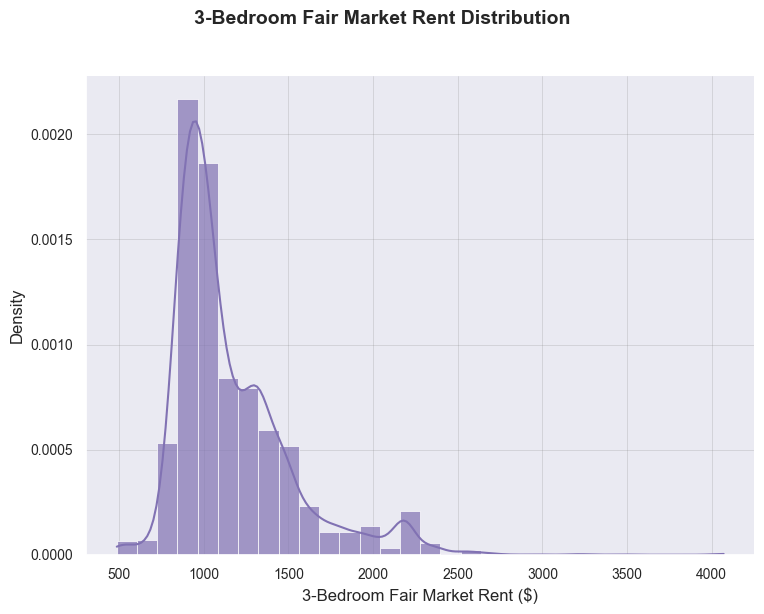

In [19]:
# Set style, enable color code, and create a magenta displot with enhanced styling
sns.set(color_codes=True)

g = sns.displot(
    data=rent, 
    x="fmr_3", 
    color="m",
    bins=30,
    kde=True,
    stat="density",
    alpha=0.7,
    edgecolor="white",
    linewidth=0.5,
    height=6,
    aspect=1.3
)

g.figure.suptitle("3-Bedroom Fair Market Rent Distribution", 
                  fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("3-Bedroom Fair Market Rent ($)", "Density")

# Add grid and styling to all axes
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3, color="gray", linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)

sns.despine()
plt.tight_layout()
plt.show()

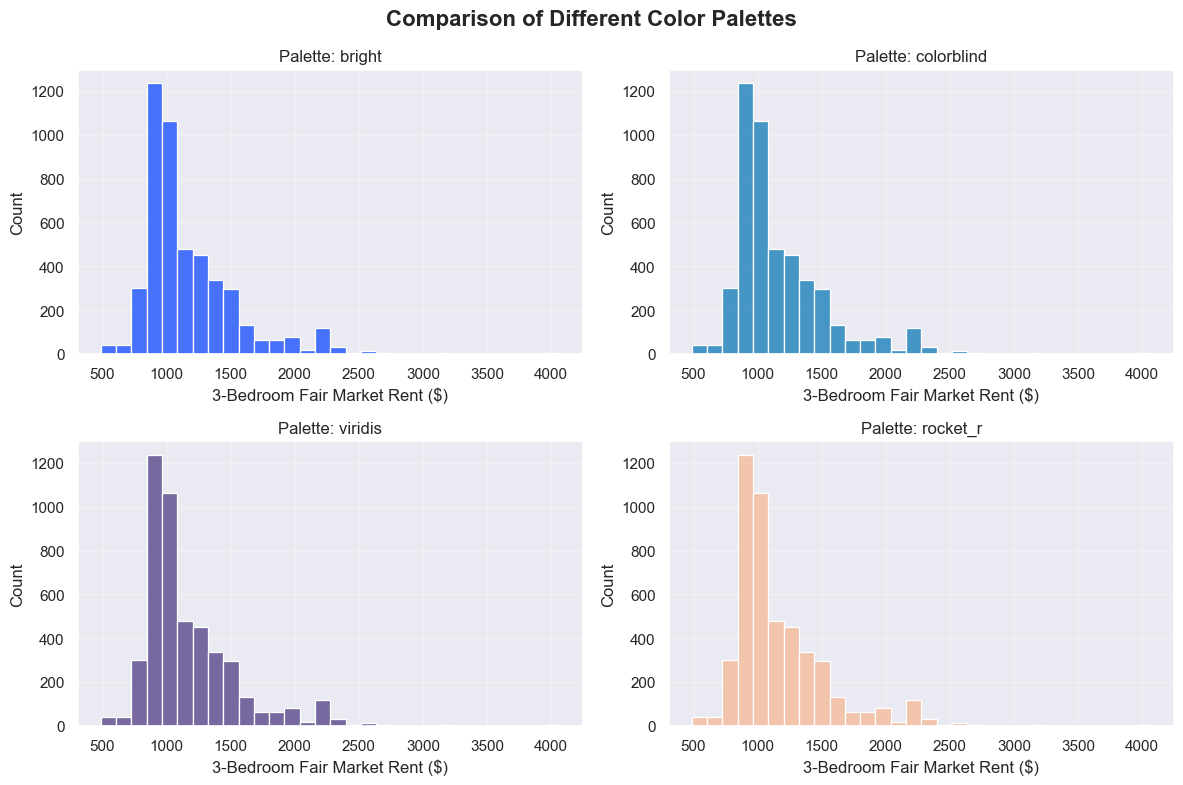

In [20]:
# Create a 2x2 subplot layout for the four palettes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten to make indexing easier

palettes = ["bright", "colorblind", "viridis", "rocket_r"]

for i, p in enumerate(palettes):
    # Get the first color from each palette
    palette_colors = sns.color_palette(p)
    color = palette_colors[0]  # Use the first color from the palette
    
    sns.histplot(data=rent, x="fmr_3", ax=axes[i], bins=30, alpha=0.7, color=color)
    axes[i].set_title(f"Palette: {p}")
    axes[i].set_xlabel("3-Bedroom Fair Market Rent ($)")
    axes[i].set_ylabel("Count")
    axes[i].grid(True, alpha=0.3)

plt.suptitle("Comparison of Different Color Palettes", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

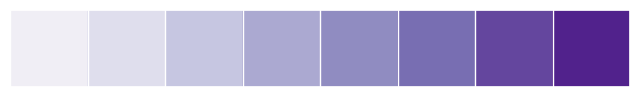

In [21]:
# Create and display a Purples sequential palette containing 8 colors.
sns.palplot(sns.color_palette("Purples", 8))
plt.show()

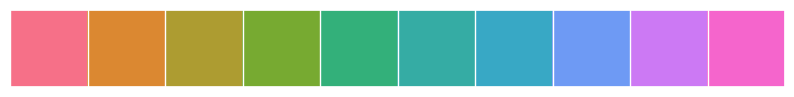

In [22]:
# Create and display a palette with 10 colors using the husl system.
sns.palplot(sns.color_palette("husl", 10))
plt.show()

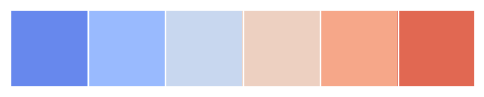

In [23]:
# Create and display a diverging palette with 6 colors coolwarm.
sns.palplot(sns.color_palette("coolwarm", 6))
plt.show()

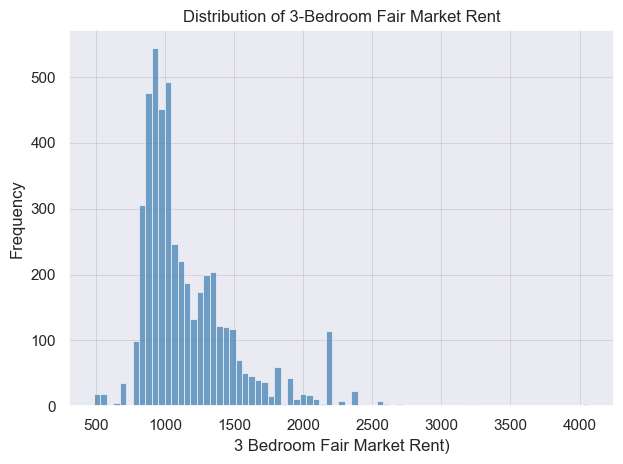

In [24]:
# Use plt.subplots() to create a axes and figure objects and plot a histplot of column fmr_3 on the axes.
fig, ax = plt.subplots()

sns.histplot(rent["fmr_3"], ax=ax, color="steelblue")

ax.set(
    xlabel="3 Bedroom Fair Market Rent)",
    ylabel="Frequency",
    title="Distribution of 3-Bedroom Fair Market Rent",
)

ax.grid(True, color="grey", linewidth=0.5, linestyle='-', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

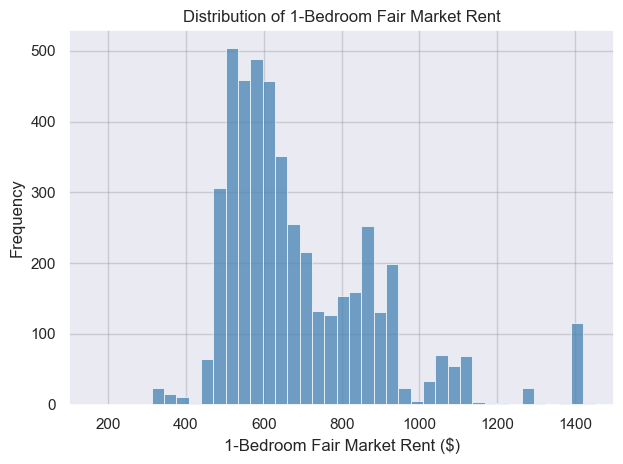

In [25]:
# Create a histplot of the fmr_1 column, change the x axis limits to be between 100 and 1500.
fig, ax = plt.subplots()

sns.histplot(data=rent["fmr_1"], ax=ax, color="steelblue")

ax.set(
    xlabel="1-Bedroom Fair Market Rent ($)", 
    ylabel="Frequency", 
    title="Distribution of 1-Bedroom Fair Market Rent",
    xlim=(100, 1500)
)
ax.grid(True, color="grey", alpha=0.3, linestyle='-')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [26]:
# Calculate mean and median for fmr_1 column
mean_fmr1 = np.mean(rent["fmr_1"])
median_fmr1 = np.median(rent["fmr_1"])

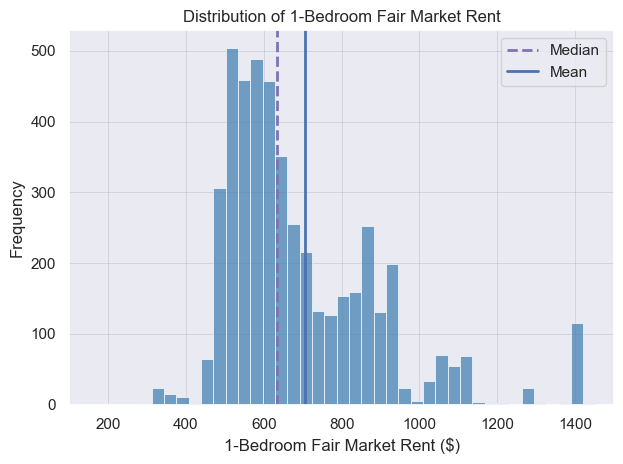

In [27]:
# Plot the fmr_1 column distribution, and add a vertical line using axvline for the median and mean of the values
fig, ax = plt.subplots()

sns.histplot(rent["fmr_1"], ax=ax, color="steelblue")
ax.set(xlabel="1-Bedroom Fair Market Rent ($)", ylabel="Frequency", xlim=(100, 1500), title="Distribution of 1-Bedroom Fair Market Rent")

# Add vertical lines for the median and mean
ax.axvline(x=median_fmr1, color="m", label="Median", linestyle="--", linewidth=2)
ax.axvline(x=mean_fmr1, color="b", label="Mean", linestyle="-", linewidth=2)
ax.legend()

ax.grid(True, alpha=0.3, color="grey", linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

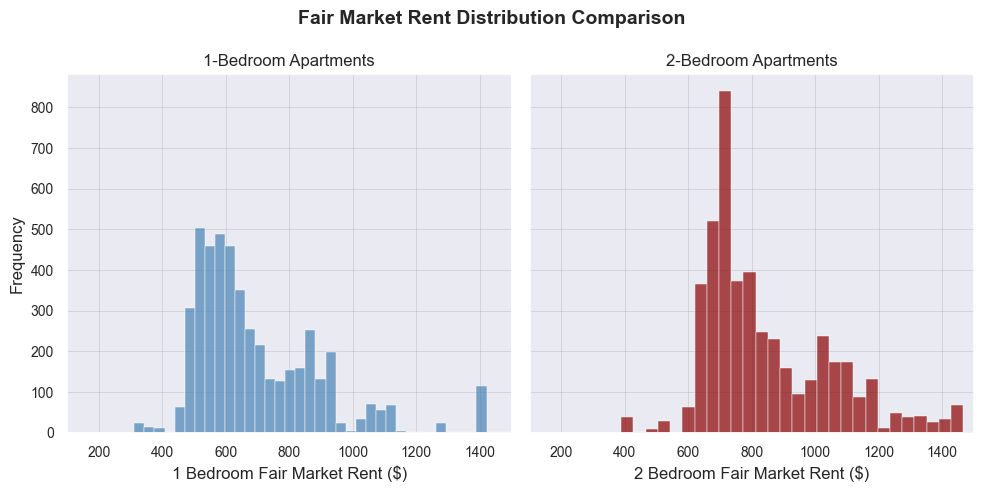

In [28]:
# Create two axes objects, ax0 and ax1; Plot fmr_1 on ax0 and fmr_2 on ax1.
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))

# Plot the distribution of 1 bedroom apartments on ax0
sns.histplot(rent["fmr_1"], ax=ax0, color="steelblue", alpha=0.7)
ax0.set(xlabel="1 Bedroom Fair Market Rent ($)", 
        ylabel="Frequency",
        title="1-Bedroom Apartments",
        xlim=(100, 1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.histplot(rent["fmr_2"], ax=ax1, color="darkred", alpha=0.7)
ax1.set(xlabel="2 Bedroom Fair Market Rent ($)", 
        title="2-Bedroom Apartments",
        xlim=(100, 1500))

# Apply styling to both axes
for ax in [ax0, ax1]:
    ax.grid(True, alpha=0.3, linestyle='-', color="grey", linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(labelsize=10)

fig.suptitle("Fair Market Rent Distribution Comparison", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Categorical Plot Types in Seaborn

**Categorical data** consists of variables with a limited, fixed set of possible values—such as categories or groups. Visualising categorical data effectively helps reveal insights into relationships, patterns, distributions, and statistical properties. **Seaborn** offers versatile categorical plots, broadly classified as either visualisations of individual observations or statistical summaries.

### Understanding Categorical Data

Categorical variables often represent groups or types, including but not limited to:

- Geographic regions (country, state, city)
- Demographic characteristics (gender, ethnicity, blood type)
- Qualitative traits (eye color, product type)

Typically, categorical variables are visualised in conjunction with numeric variables.

### Categorical Plot Types

Seaborn categorises plots into two main groups:

1. **Observation-level plots**: Display all data points.
   - `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `boxenplot`

2. **Statistical-estimation plots**: Summarise data statistically.
   - `barplot`, `pointplot`, `countplot`

### 1. Plotting Individual Observations

#### a. Strip Plot: Simple Scatter of Observations

- **Purpose**: Visualise distribution across categories.
- **Tip**: Use `jitter` to avoid overlapping points.

```python
sns.stripplot(data=df, x="numeric_var", y="category_var", jitter=True, color="dodgerblue")
```

**OOP Interface:**
```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.stripplot(data=df, x="numeric_var", y="category_var", jitter=True, ax=ax, palette="Set2")
ax.set_title("Strip Plot of Numeric Variable by Category")
plt.tight_layout()
plt.show()
```

#### b. Swarm Plot: Scatter Plot with Non-Overlapping Points

- **Purpose**: Clearly visualises the distribution of data points within each category.
- **Tip**: Best for smaller datasets, as it arranges points to avoid overlap.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.swarmplot(data=df, x="numeric_var", y="category_var", ax=ax, size=5, palette="Set1")
ax.set_title("Swarm Plot of Numeric Variable by Category")
plt.tight_layout()
plt.show()
```

#### c. Box Plot: Visualising Summary Statistics and Outliers

- **Purpose**: Display median, quartiles, and potential outliers.
- **Tip**: Clear indication of skewness and outliers.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x="numeric_var", y="category_var", ax=ax, palette="Pastel1", showfliers=True)
ax.set_title("Box Plot by Category")
plt.tight_layout()
plt.show()
```

#### d. Violin Plot: Combining Box Plot with KDE

- **Purpose**: Visualise distribution shape, density, and central tendency.
- **Tip**: Excellent for comparing distribution shapes across categories.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=df, x="numeric_var", y="category_var", ax=ax, palette="Pastel2", inner="quartile")
ax.set_title("Violin Plot (Density & Quartiles)")
plt.tight_layout()
plt.show()
```

#### e. Boxen Plot: Enhanced Box Plot (Letter-value Plot)

- **Purpose**: Detailed representation of data distribution, ideal for large datasets.
- **Tip**: Better at revealing subtle distribution features.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxenplot(data=df, x="numeric_var", y="category_var", ax=ax, palette="muted")
ax.set_title("Boxen Plot (Detailed Box Plot)")
plt.tight_layout()
plt.show()
```

### 2. Statistical Estimates of Categories

#### a. Bar Plot: Summarising Central Tendency (Mean) with Confidence Intervals

- **Purpose**: Clearly communicate the average and uncertainty.
- **Tip**: Use `hue` to compare across another categorical dimension.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x="numeric_var", y="category_var", hue="group_var", ci="sd", palette="Blues_d", ax=ax)
ax.set_title("Bar Plot (Mean with Confidence Interval)")
plt.tight_layout()
plt.show()
```

#### b. Point Plot: Connect Estimates Across Categories

- **Purpose**: Highlight relationships and trends clearly.
- **Tip**: Excellent for demonstrating interaction between categories.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.pointplot(data=df, x="numeric_var", y="category_var", hue="group_var",
              dodge=True, markers='o', capsize=.1, palette="colorblind", ax=ax)
ax.set_title("Point Plot (Trend of Means)")
plt.tight_layout()
plt.show()
```
#### c. Count Plot: Frequency of Categorical Observations

- **Purpose**: Directly visualise category frequencies.
- **Tip**: Useful for purely categorical data without numeric measurements.

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, y="category_var", hue="group_var", palette="Set3", ax=ax)
ax.set_title("Count Plot (Categorical Frequency)")
plt.tight_layout()
plt.show()
```

### Tips for Optimal Categorical Plots

- Use **hue** judiciously to add categorical distinctions.
- **Set size and aspect** to clearly visualise categories and reduce overlap.
- Combine complementary plots (e.g., stripplot + boxplot) for richer insight:
  ```python
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.boxplot(data=df, x="numeric_var", y="category_var", ax=ax, palette="Pastel2")
  sns.stripplot(data=df, x="numeric_var", y="category_var", color='black', size=3, jitter=True, ax=ax)
  ax.set_title("Box Plot with Individual Observations")
  plt.tight_layout()
  plt.show()
  ```

### Theory and Visualisation Strategy

- **Observation-level plots** are excellent for detailed exploration, identifying outliers, and distribution shape.
- **Statistical-estimation plots** summarise data succinctly, ideal for reporting and communicating insights.
- Consider dataset size and objective when selecting a plot type.

### Pythonic Best Practices for Categorical Plotting

- Use explicit **OOP interface** (`fig, ax`) for maximal control.
- Always label axes clearly and set appropriate titles.
- Be thoughtful about color palette choice, especially for multiple categories.



In [29]:
school = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/205443d734f177d36dad2f0bdf821a57b2c4cc13/schoolimprovement2010grants.csv")
school.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


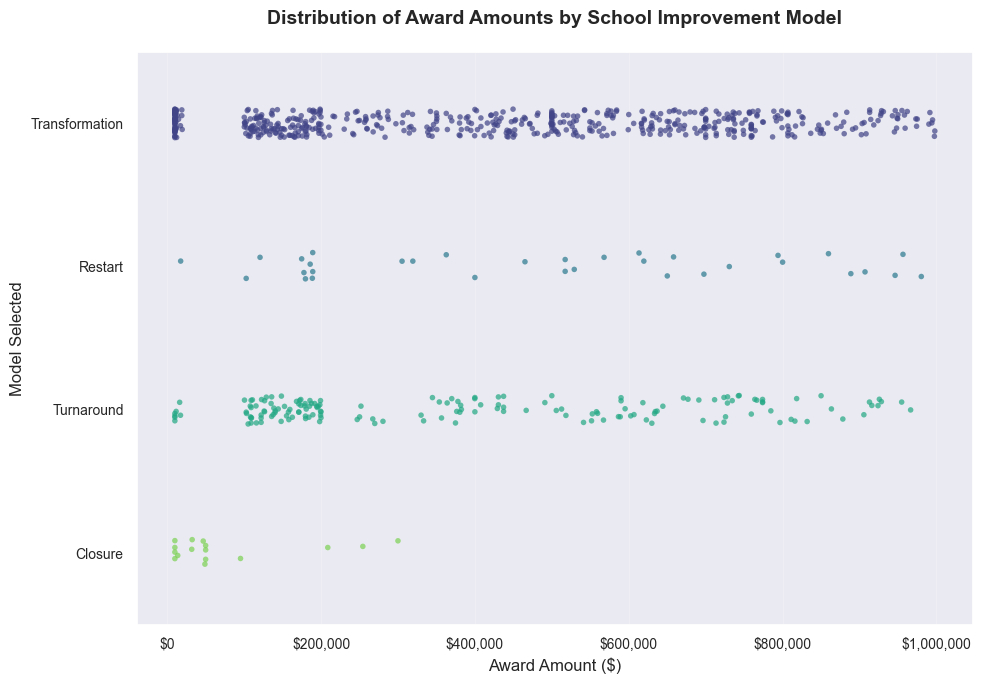

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.stripplot(
    data=school, 
    x="Award_Amount", 
    y="Model Selected", 
    jitter=True,
    size=4,
    alpha=0.7,
    palette="viridis",
    ax=ax, 
    hue="Model Selected"
)

ax.set_title("Distribution of Award Amounts by School Improvement Model", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Award Amount ($)", fontsize=12)
ax.set_ylabel("Model Selected", fontsize=12)

# Format x-axis to show currency
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='x', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Adjust tick parameters
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

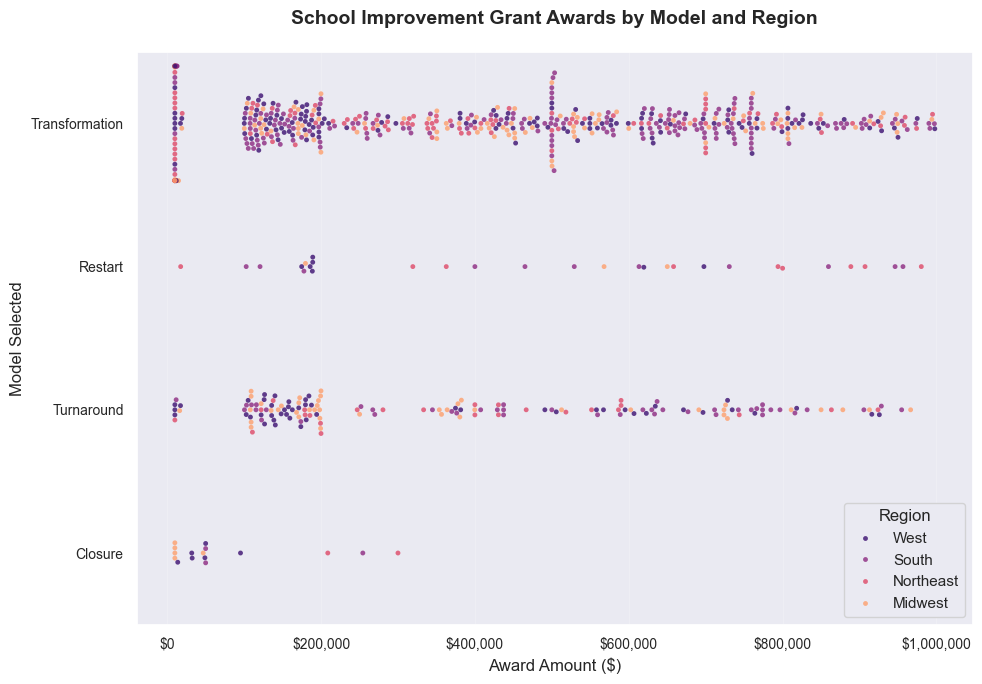

In [31]:
# Create and display a swarmplot with hue set to the Region
fig, ax = plt.subplots(figsize=(10, 7))

sns.swarmplot(
    data=school,
    x="Award_Amount",
    y="Model Selected",
    hue="Region",
    palette="magma",
    size=3.5,  # Reduce marker size to fit more points
    alpha=0.8,
    ax=ax,
)

ax.set_title(
    "School Improvement Grant Awards by Model and Region",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.set_xlabel("Award Amount ($)", fontsize=12)
ax.set_ylabel("Model Selected", fontsize=12)

# Format x-axis to show currency
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for better readability
ax.grid(True, alpha=0.3, axis="x", linestyle="-", linewidth=0.5)
ax.set_axisbelow(True)

# Adjust tick parameters
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

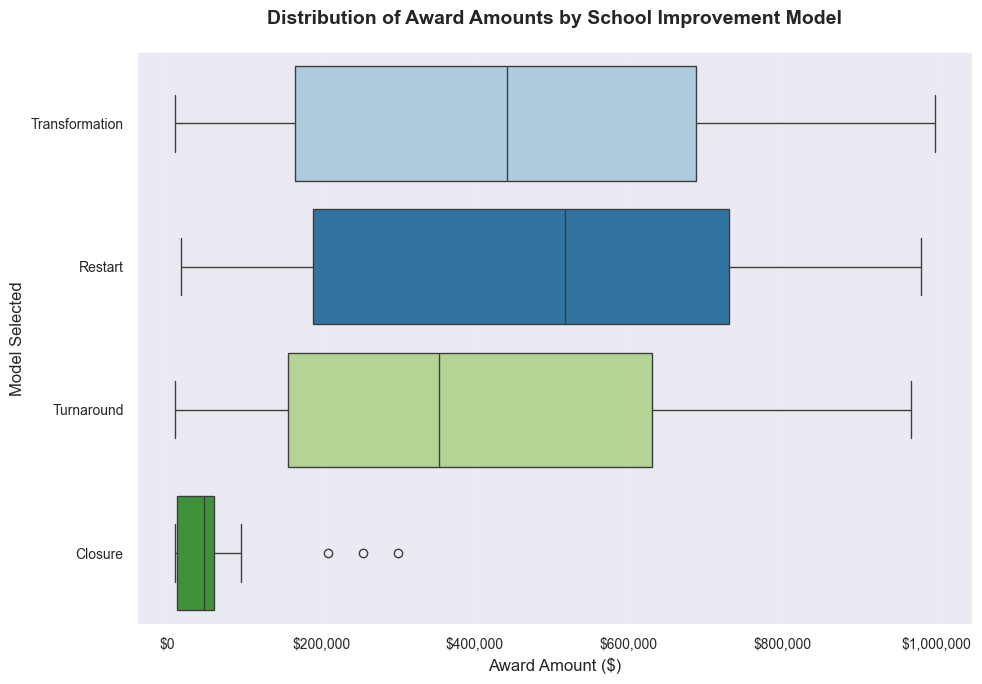

In [32]:
# Create and display a boxplot of the data with Award_Amount on the x axis and Model Selected on the y axis.
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxplot(
    data=school,
    x="Award_Amount",
    y="Model Selected",
    palette="Paired",
    ax=ax, 
    hue="Model Selected"
)

ax.set_title(
    "Distribution of Award Amounts by School Improvement Model",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.set_xlabel("Award Amount ($)", fontsize=12)
ax.set_ylabel("Model Selected", fontsize=12)

# Format x-axis to show currency
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

# Add grid for better readability
ax.grid(True, alpha=0.3, axis="x", linestyle="-", linewidth=0.5)
ax.set_axisbelow(True)

# Adjust tick parameters
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

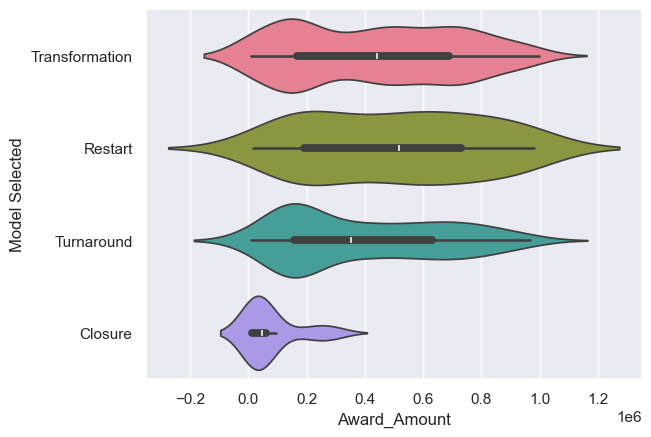

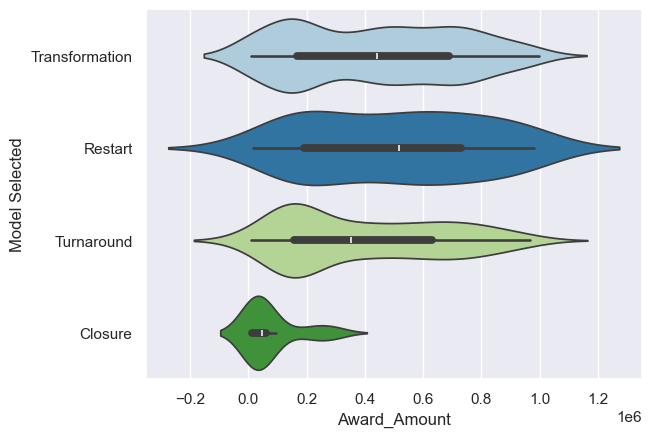

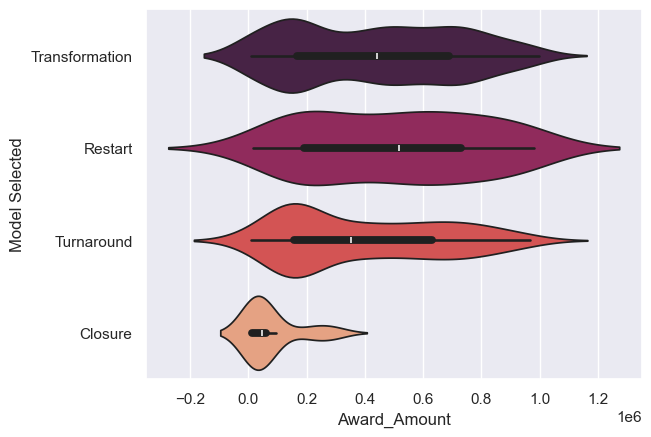

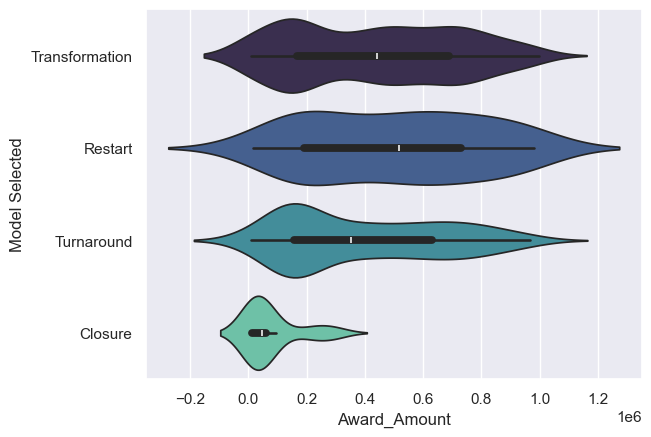

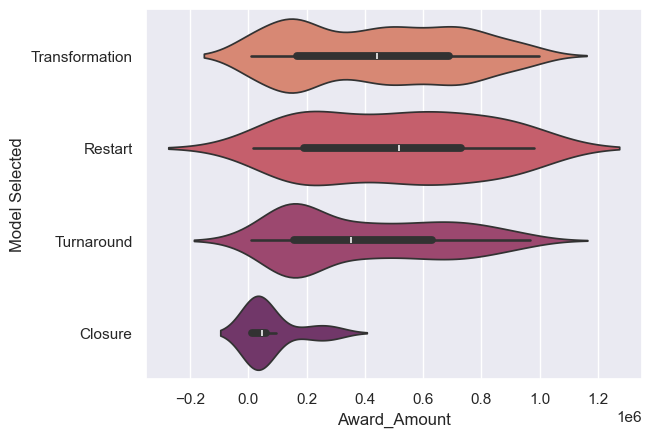

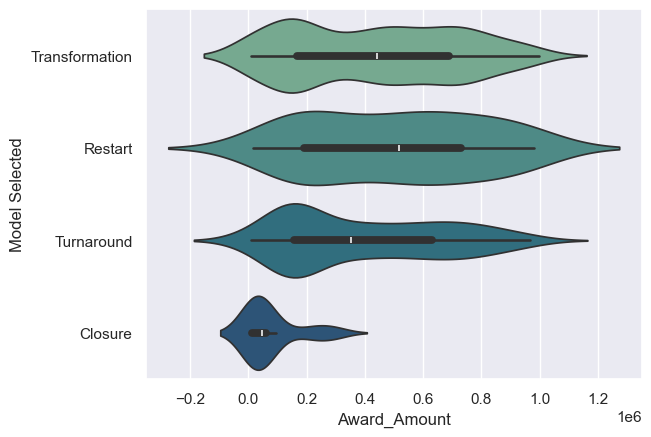

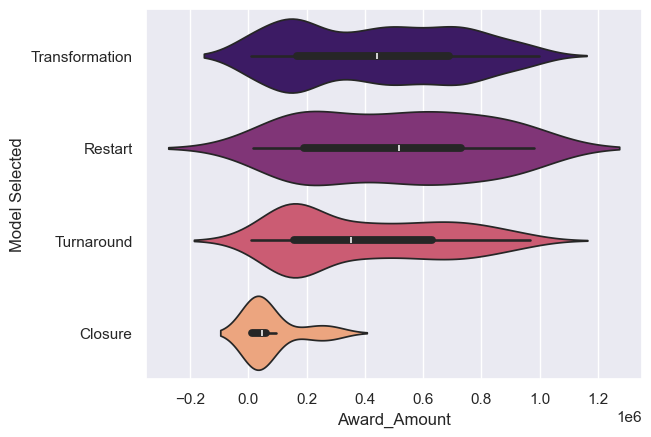

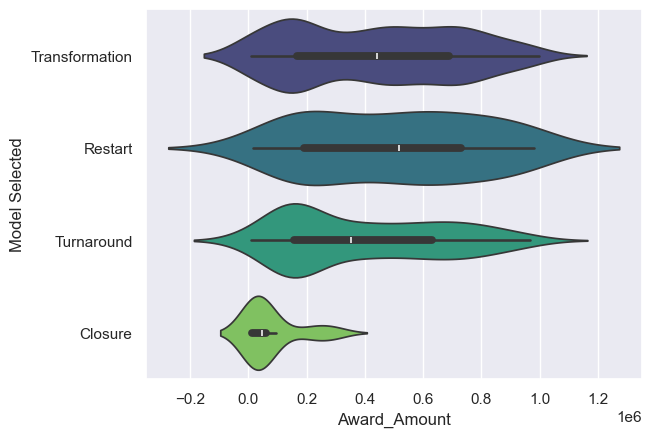

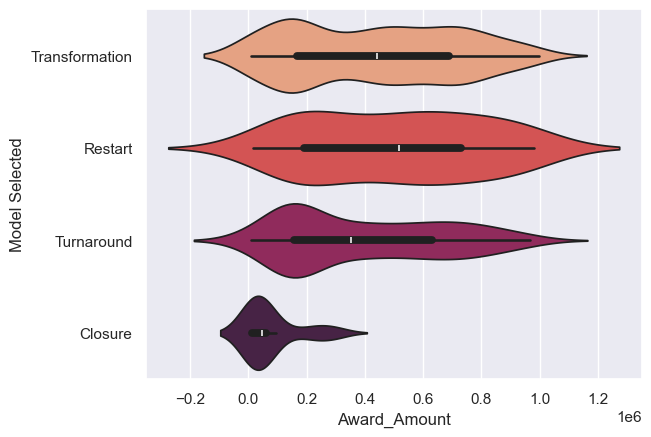

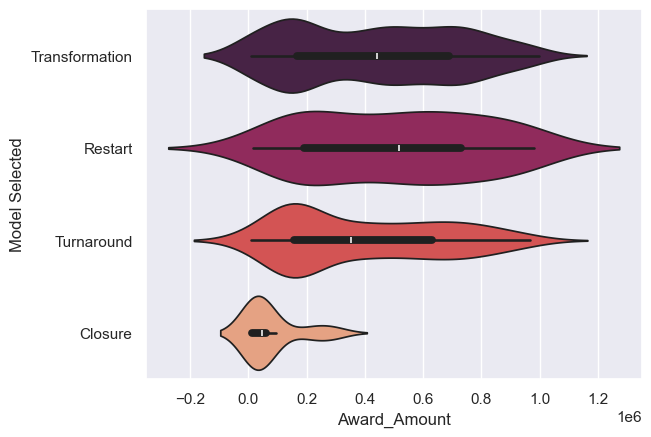

In [33]:
# Create and display a similar violinplot of the data, but use the husl palette for colors.
# Use Award_Amount on the x axis and Model Selected on the y axis.
palettes = [
    "husl",
    "Paired",
    "rocket",
    "mako",
    "flare",
    "crest",
    "magma",
    "viridis",
    "rocket_r",
    "rocket",
]
# Create a grid layout with 3 columns and enough rows for all palettes
n_palettes = len(palettes)
n_cols = 3
n_rows = (n_palettes + n_cols - 1) // n_cols  # Calculate rows needed


for option in palettes:
    sns.violinplot(
        data=school,
        x="Award_Amount",
        y="Model Selected",
        hue="Model Selected",
        palette=option,
    )

    plt.show()

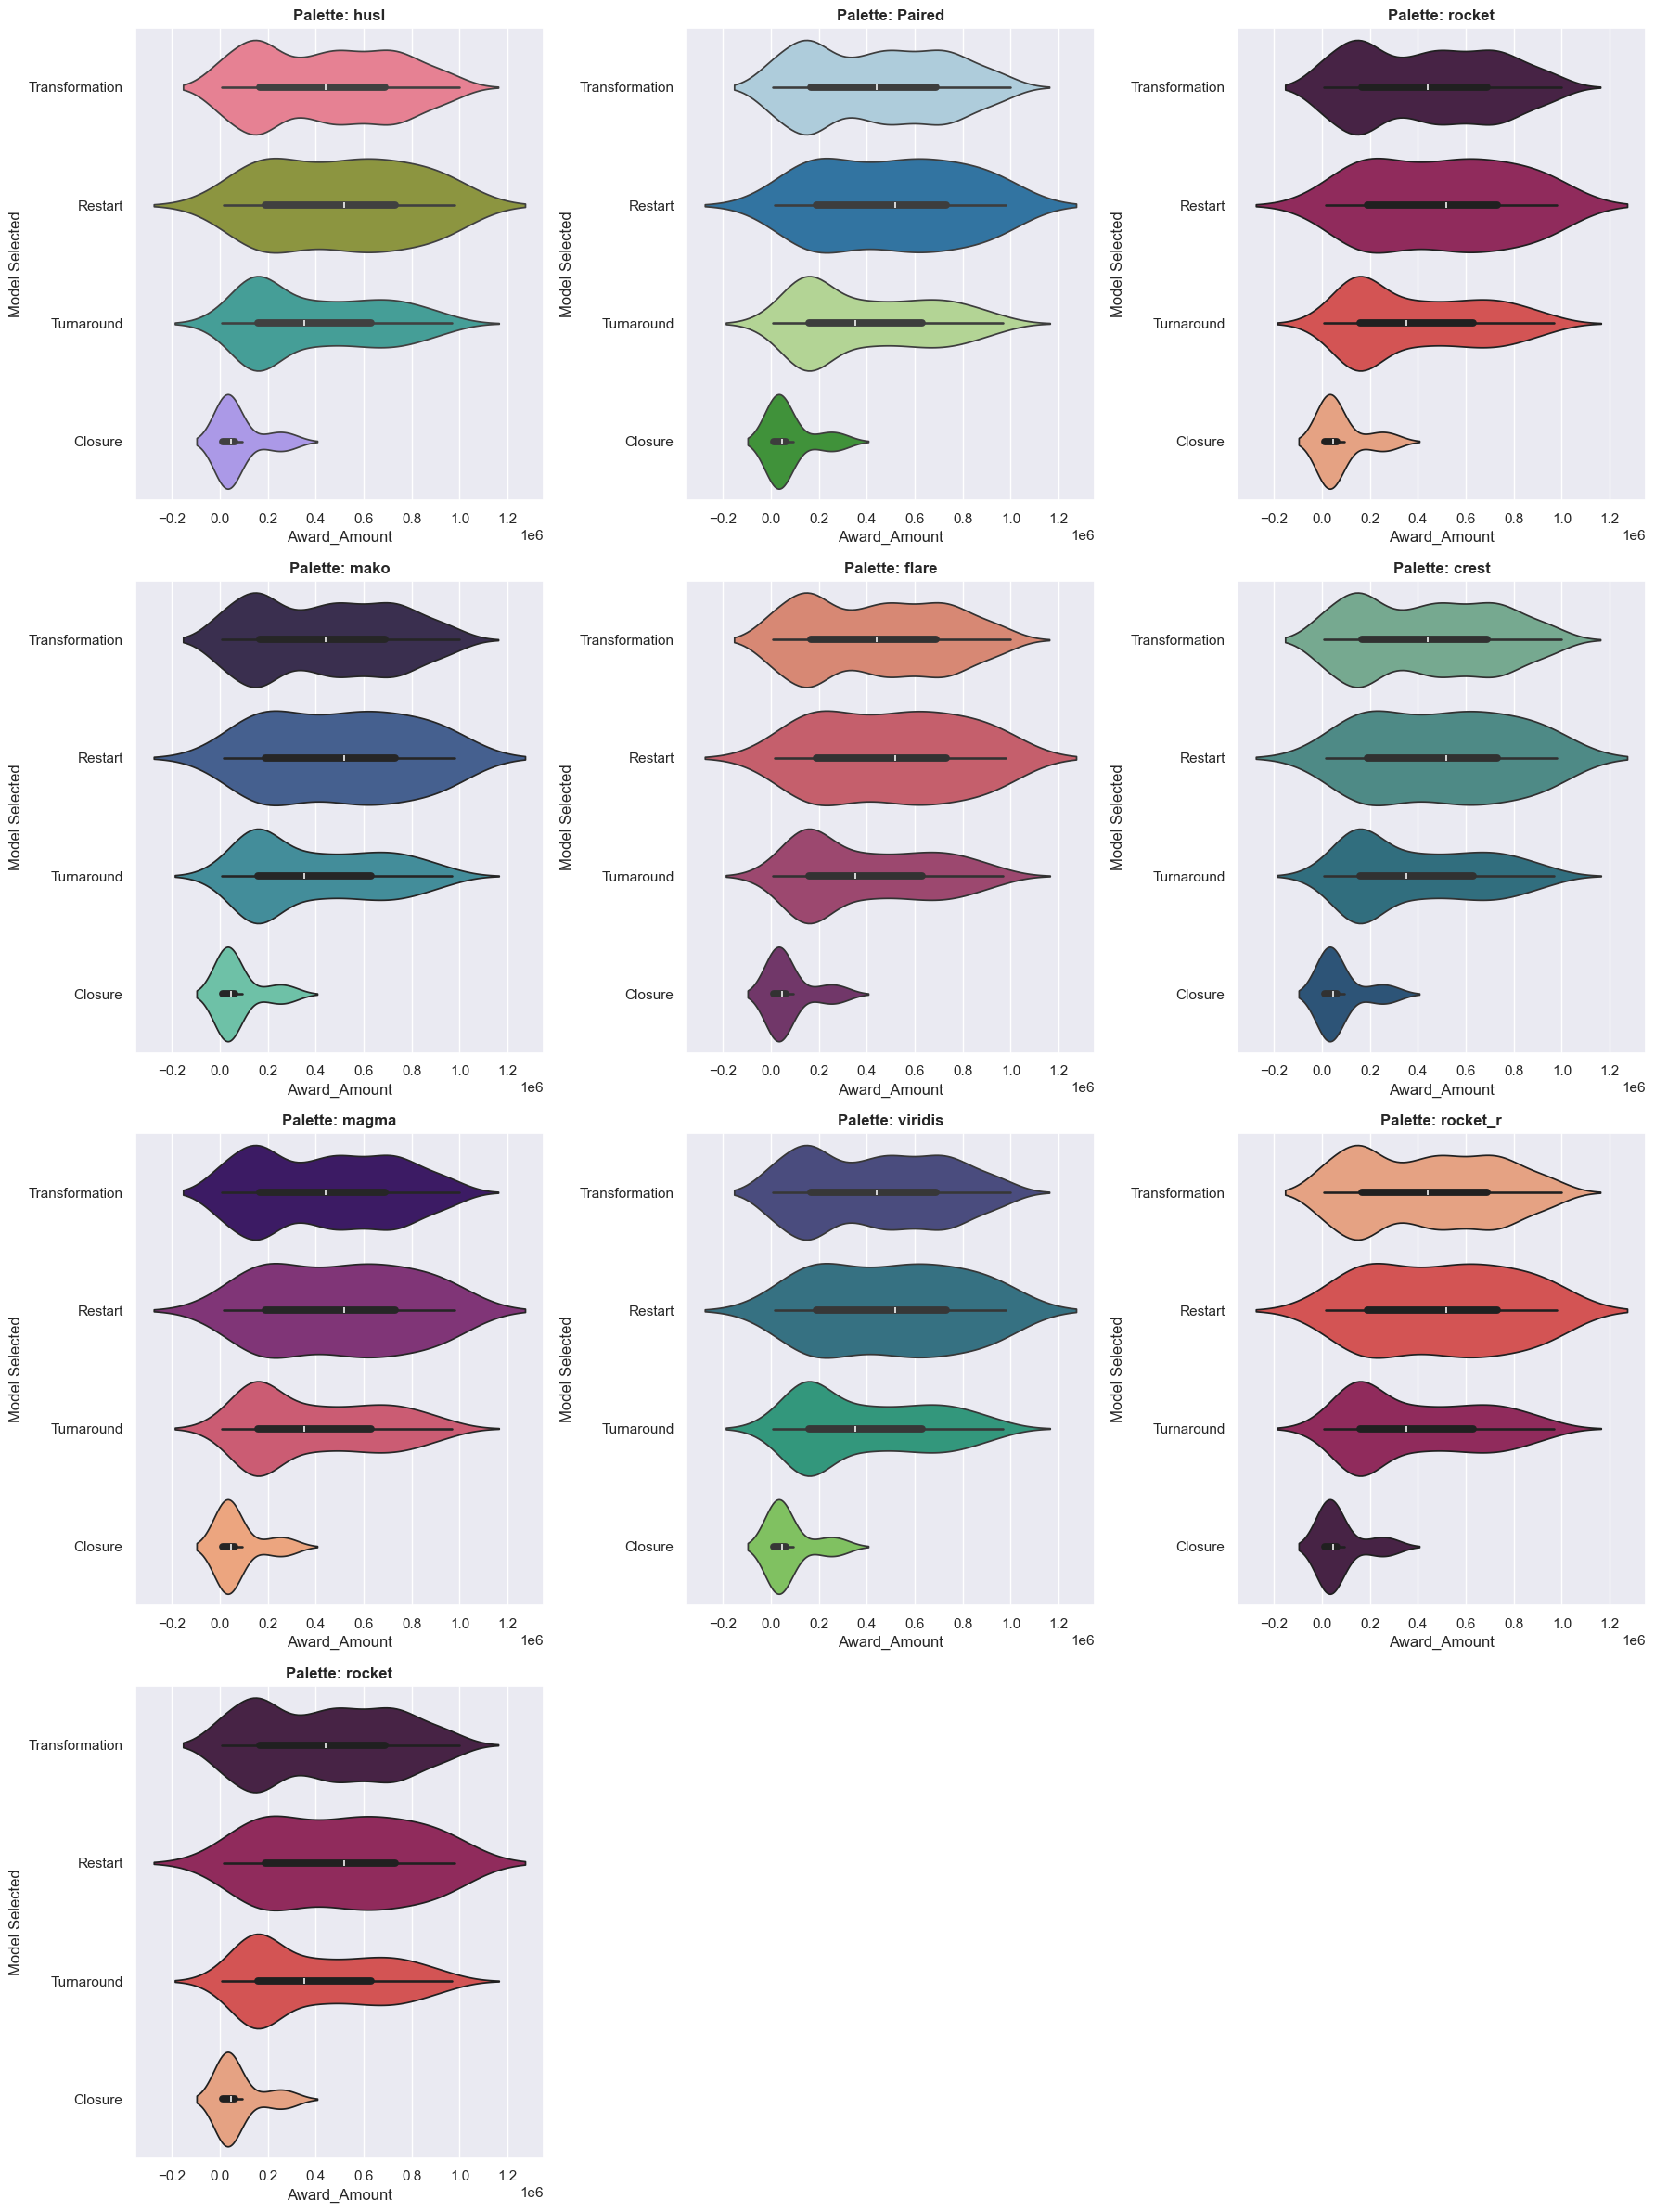

In [34]:
# Define list of color palettes to compare
palettes = ["husl", "Paired", "rocket", "mako", "flare", "crest", "magma", "viridis", "rocket_r", "rocket"]    

# Calculate grid dimensions for subplot layout
n_palettes = len(palettes)
n_cols = 3  # Number of columns in the grid
n_rows = (n_palettes + n_cols - 1) // n_cols  # Calculate rows needed using ceiling division

# Create subplot grid with appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten 2D array to 1D for easier indexing

# Generate violin plots for each palette
for i, palette in enumerate(palettes):
    sns.violinplot(
        data=school, 
        x="Award_Amount", 
        y="Model Selected", 
        hue="Model Selected", 
        palette=palette,
        ax=axes[i]  # Plot on specific subplot
    )
    # Add title showing which palette is being used
    axes[i].set_title(f"Palette: {palette}", fontsize=12, fontweight='bold')

# Hide any unused subplots (when total plots < grid size)
for i in range(n_palettes, len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

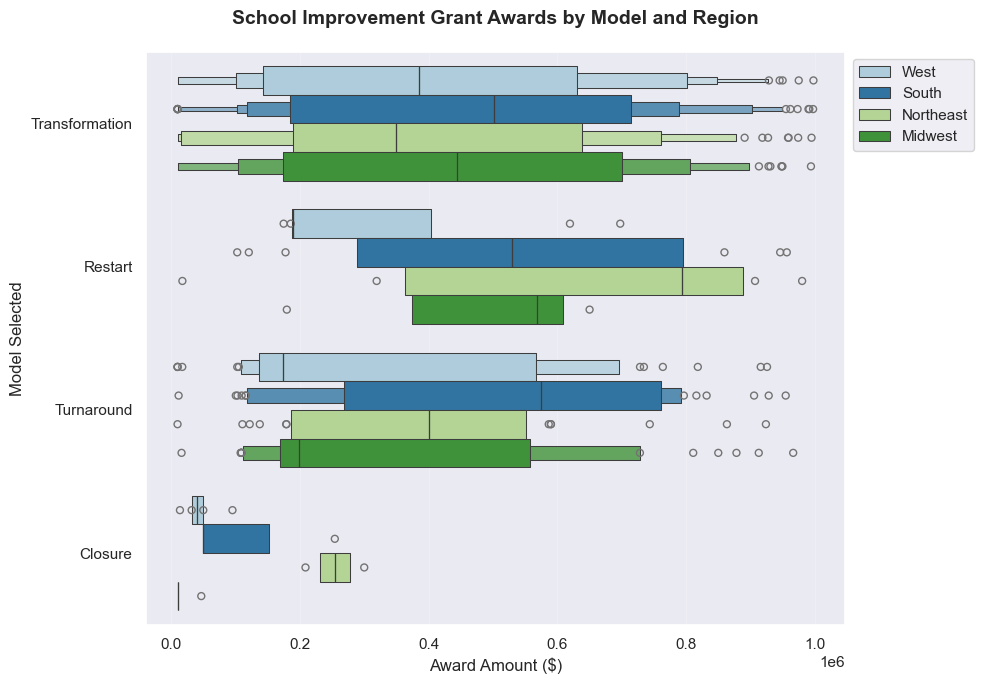

In [35]:
# Create and display an boxenplot using the Paired palette and the Region column as the hue.
fig, ax = plt.subplots(figsize=(10, 7))

sns.boxenplot(data=school, x="Award_Amount", y="Model Selected", palette="Paired", hue="Region", ax=ax)

ax.set_title("School Improvement Grant Awards by Model and Region", 
			 fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Award Amount ($)", fontsize=12)
ax.set_ylabel("Model Selected", fontsize=12)


# Add grid for better readability
ax.grid(True, alpha=0.3, axis='x', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Move legend outside the plot area
ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()

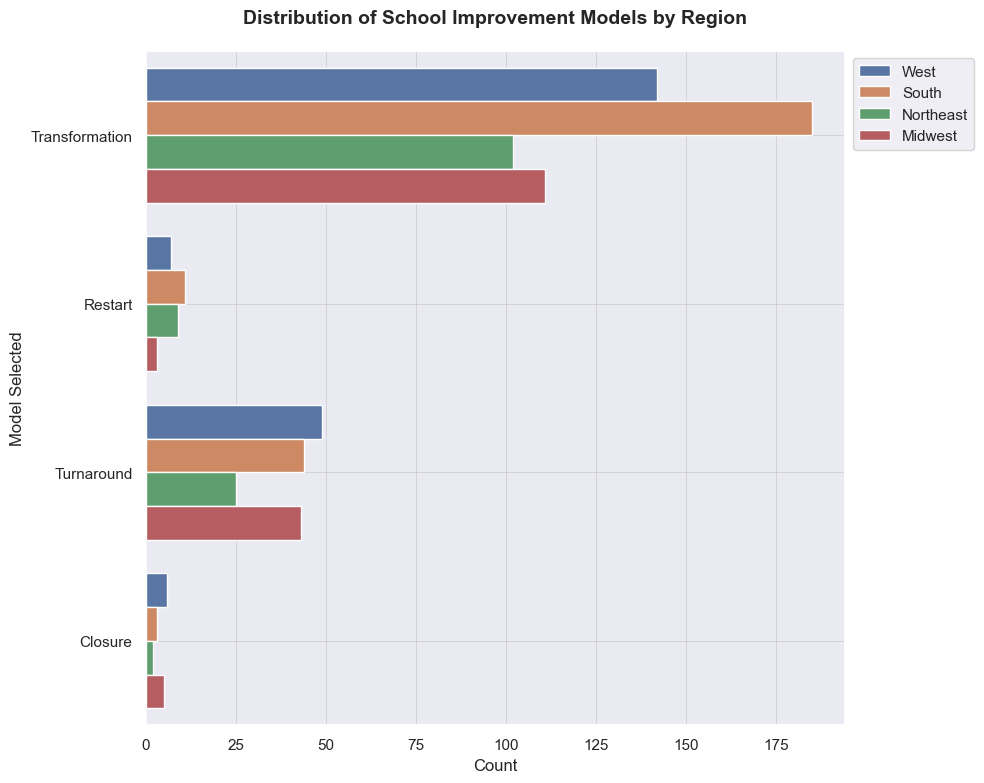

In [36]:
# Create a countplot with the df dataframe and Model Selected on the y axis and the color varying by Region.
fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(data=school, 
              y="Model Selected",
              hue="Region",
              palette="deep",
              ax=ax)

ax.set_title("Distribution of School Improvement Models by Region", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Model Selected", fontsize=12)

ax.grid(True, alpha=0.3, color="grey", linewidth=0.5)
ax.set_axisbelow(True)

ax.legend(bbox_to_anchor=(1.0, 1), loc="upper left")


plt.tight_layout()
plt.show()

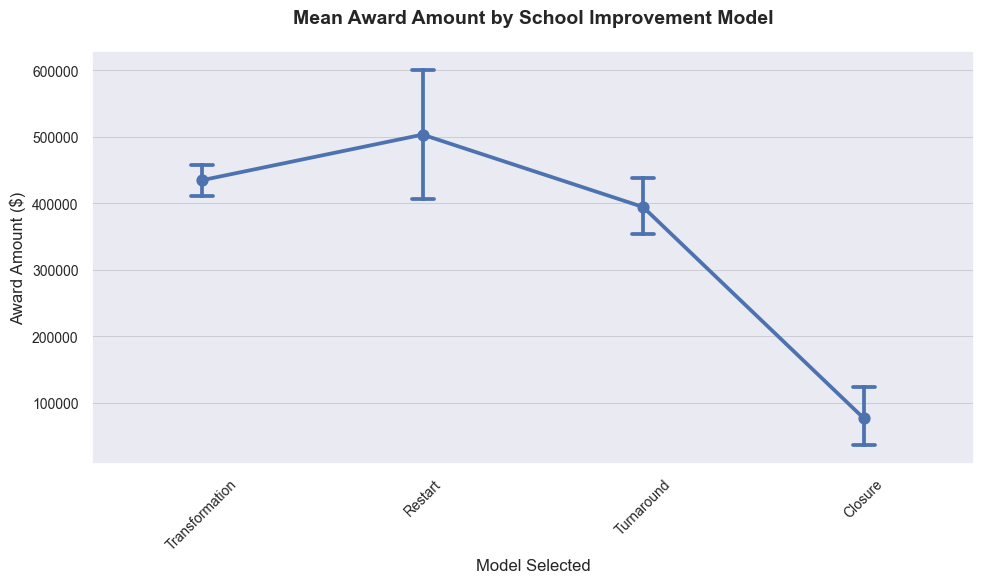

In [37]:
# Create a pointplot with the df dataframe and Model Selected on the x-axis and Award_Amount on the y-axis.
# Use a capsize in the pointplot in order to add caps to the error bars.

fig, ax = plt.subplots(figsize=(10, 6))

sns.pointplot(
    data=school,
    x="Model Selected",
    y="Award_Amount",
    capsize=0.1,
    ax=ax,
    markers="o",
    linestyles="-",
)

ax.set_title("Mean Award Amount by School Improvement Model", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("Model Selected", fontsize=12)
ax.set_ylabel("Award Amount ($)", fontsize=12)

# Rotate x-axis labels for better readability
ax.tick_params(axis="x", rotation=45, labelsize=10)
ax.tick_params(axis="y", labelsize=10)

# Add grid for better readability
ax.grid(True, alpha=0.4, axis="y", linestyle="-", linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

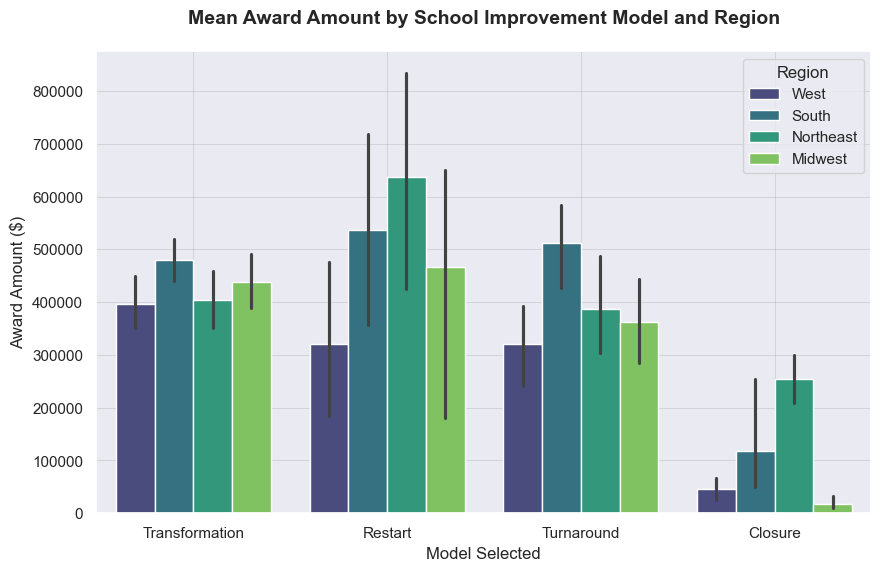

In [38]:
# Create a barplot with the same data on the x and y axis and change the color of each bar based on the Region column.
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=school,
    x="Model Selected",
    y="Award_Amount",
    hue="Region",
    palette="viridis"
)
ax.set_title("Mean Award Amount by School Improvement Model and Region", fontsize=14, fontweight="bold", pad=20)
ax.set_xlabel("Model Selected", fontsize=12)
ax.set_ylabel("Award Amount ($)", fontsize=12)

ax.grid(True, alpha=0.3, linewidth=0.5, linestyle='-', color="grey")
ax.set_axisbelow(True)
plt.show()

## Regression Plots with Seaborn

Regression plots visualise and evaluate the relationships between numerical variables. **Seaborn's** regression functions, such as `regplot()` and `residplot()`, provide powerful yet Pythonic tools for exploring, fitting, and validating regression models, including polynomial fits and sophisticated diagnostic evaluations.


### 1. Basic Regression Plots with `regplot()`

The `regplot()` function creates scatter plots with fitted regression lines, providing immediate insights into potential linear relationships.

#### API Interface:

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x='x_variable', y='y_variable', marker='+', color='blue')
plt.title("Regression Plot (Linear)")
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.tight_layout()
plt.show()
```

#### OOP Interface (Recommended for Customisation):

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df, x='x_variable', y='y_variable', marker='+',
    scatter_kws={'alpha': 0.6, 'color': 'navy'},
    line_kws={'color': 'red', 'linewidth': 2}, ax=ax
)
ax.set_title("Detailed Regression Plot")
ax.set_xlabel("Predictor")
ax.set_ylabel("Response")
plt.tight_layout()
plt.show()
```

**Tips:**  
- Customise scatter points (`scatter_kws`) and regression line (`line_kws`) for clarity and aesthetics.
- Adjust transparency (`alpha`) for visualisation of overlapping data points.

### 2. Residual Plots with `residplot()`: Evaluating Model Fit

Residual plots display the difference (residual) between observed and predicted values. They are crucial for diagnosing regression model fit and identifying patterns not captured by the model.

#### API Interface:

```python
sns.residplot(data=df, x='x_variable', y='y_variable', lowess=True, color='green')
plt.title("Residual Plot (Linear)")
plt.xlabel("Predictor")
plt.ylabel("Residuals")
plt.axhline(0, color='gray', linestyle='--')  # Reference line at residual = 0
plt.tight_layout()
plt.show()
```

#### OOP Interface:

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.residplot(
    data=df, x='x_variable', y='y_variable',
    lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'orange'}, ax=ax
)
ax.axhline(0, linestyle='--', color='grey')
ax.set_title("Diagnostic Residual Plot")
ax.set_xlabel("Predictor")
ax.set_ylabel("Residuals")
plt.tight_layout()
plt.show()
```

**Interpretation:**  
- Look for **random scatter** around zero line.  
- Patterns indicate potential issues (non-linearity, heteroscedasticity).

### 3. Polynomial Regression

To model non-linear relationships, Seaborn supports polynomial regression through the `order` parameter in `regplot()`:

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df, x='x_variable', y='y_variable', order=2,
    scatter_kws={'alpha':0.6}, line_kws={'color':'purple'}, ax=ax
)
ax.set_title("Polynomial Regression (order=2)")
plt.tight_layout()
plt.show()
```

**Important:**  
- Increasing the `order` captures more complex patterns but risks overfitting.
- Always validate using residual plots.

### 4. Polynomial Residual Plots

Check polynomial model quality with a residual plot:

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.residplot(
    data=df, x='x_variable', y='y_variable', order=2,
    scatter_kws={'alpha':0.5}, line_kws={'color':'black'}, ax=ax
)
ax.axhline(0, linestyle='--', color='red')
ax.set_title("Residual Plot (Polynomial, order=2)")
plt.tight_layout()
plt.show()
```

### 5. Handling Categorical Variables (Jittering)

Regression plots with categorical predictors require jittering to prevent overlap and better reveal distribution:

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df, x='categorical_variable', y='y_variable',
    x_jitter=0.1, order=2, scatter_kws={'alpha':0.6}, ax=ax
)
ax.set_title("Regression with Jittered Categories")
plt.tight_layout()
plt.show()
```

### 6. Aggregating Data with Estimators (`x_estimator`)

Highlight central tendencies by aggregating points along the x-axis using an estimator (e.g., `np.mean`):

```python
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df, x='categorical_variable', y='y_variable',
    x_estimator=np.mean, order=2, ax=ax,
    scatter_kws={'color':'black'}, line_kws={'color':'green'}
)
ax.set_title("Regression Using Mean Estimator")
plt.tight_layout()
plt.show()
```

**Benefit:**  
- Clarifies central tendency trends, useful for noisy data.

### 7. Binning Data with `x_bins`

Group continuous predictors into discrete bins to simplify trends:

```python
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(
    data=df, x='continuous_variable', y='y_variable',
    x_bins=4, scatter_kws={'color':'lightgray'}, line_kws={'color':'darkblue'}, ax=ax
)
ax.set_title("Regression with Binned Predictor")
plt.tight_layout()
plt.show()
```

**Important Notes:**  
- Binning simplifies interpretation but can obscure finer detail.
- Regression line remains fitted to original data, not bins.


### Statistical and Visual Best Practices

- Validate models with residual plots, checking for random scatter.
- Use polynomial regression judiciously, balancing complexity and interpretability.
- Employ jittering for categorical predictors.
- Consider estimators (`x_estimator`) to highlight trends clearly.
- Apply binning (`x_bins`) carefully—simplify interpretation without losing detail.

In [39]:
bike = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/794e0759b73a2d80baa5d8fb88636a47965139d3/college_datav3.csv")
bike.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [40]:
college = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/794e0759b73a2d80baa5d8fb88636a47965139d3/college_datav3.csv")
college.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


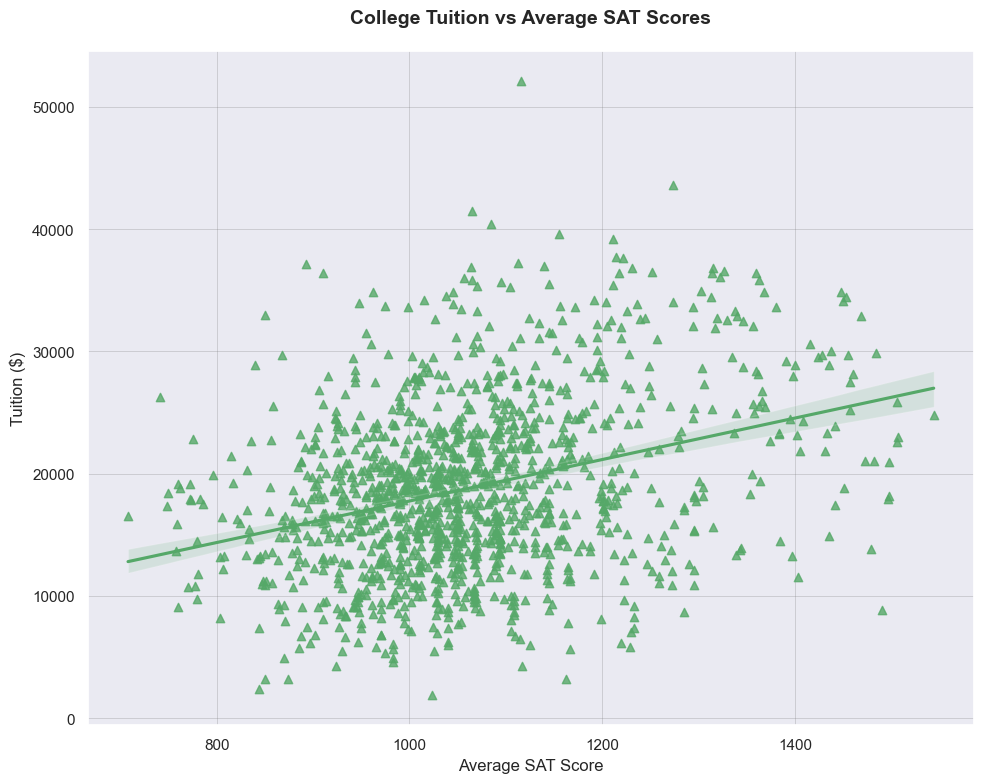

In [44]:
# Plot a regression plot comparing Tuition and average SAT scores(SAT_AVG_ALL). Make sure the values are shown as green triangles.
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(data=college, 
            y="Tuition", 
            x="SAT_AVG_ALL", 
            marker="^", 
            color="g",
            ax=ax)

ax.set_title("College Tuition vs Average SAT Scores", fontsize=14, fontweight="bold", pad=20)
ax.set(xlabel="Average SAT Score", ylabel="Tuition ($)")

ax.grid(True, color="grey", linewidth=0.5, alpha=0.4)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

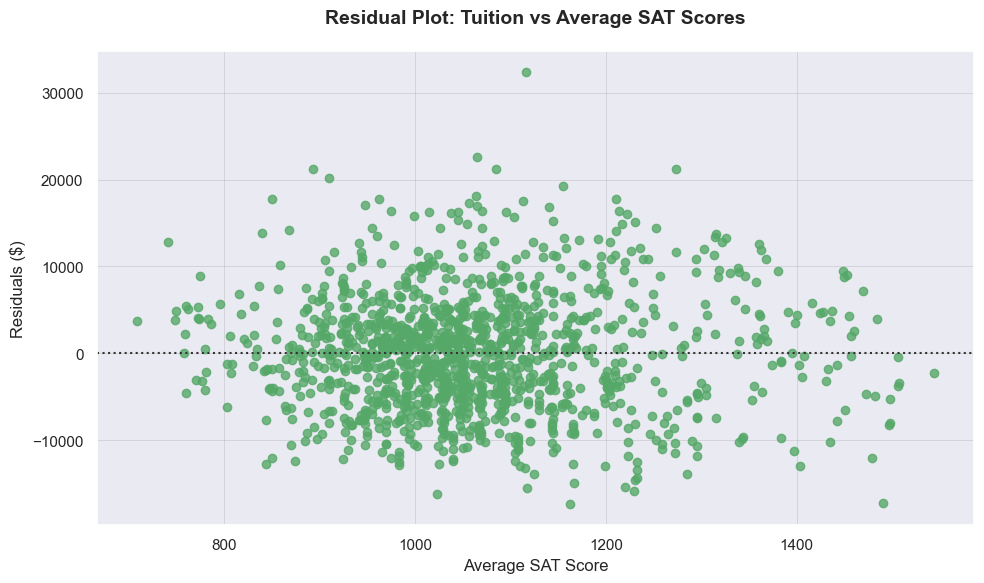

In [46]:
# Use a residual plot to determine if the relationship looks linear.
fig, ax = plt.subplots(figsize=(10, 6))

sns.residplot(data=college, 
              y="Tuition", 
              x="SAT_AVG_ALL", 
              color="g")

ax.set_title("Residual Plot: Tuition vs Average SAT Scores", fontsize=14, fontweight="bold", pad=20)
ax.set(xlabel="Average SAT Score", ylabel="Residuals ($)")

ax.grid(True, alpha=0.3, color="grey", linewidth=0.5, linestyle='-')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

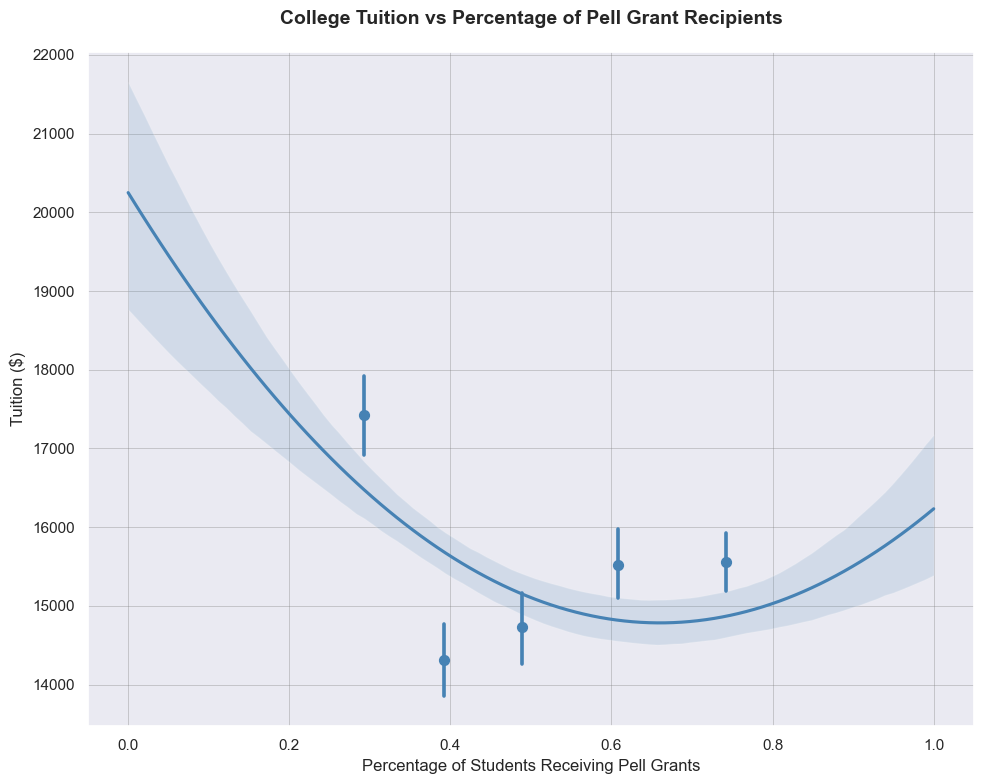

In [53]:
# Plot a regression plot of Tuition and PCTPELL.
fig, ax = plt.subplots(figsize=(10, 8))

sns.regplot(data=college, y="Tuition", x="PCTPELL", color="steelblue", ax=ax, x_bins=5, order=2)
ax.set_title(
    "College Tuition vs Percentage of Pell Grant Recipients",
    fontweight="bold",
    fontsize=14,
    pad=20,
)
ax.set(xlabel="Percentage of Students Receiving Pell Grants", ylabel="Tuition ($)")

ax.grid(True, alpha=0.5, linewidth=0.5, color="grey", linestyle="-")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()